**Análise - Índice de Sustentabilidade Empresarial**

**Variáveis Utilizadas**:

* **close**: preço de fechamento da ação

* **avg10**: média móvel de 10 dias (indicador de tendência do comportamento do preço da ação no período de 10 dias).

* **avg20**: média móvel de 20 dias (indicador de tendência do comportamento do preço da ação no período de 20 dias).

* **std10**: desvio padrão de 10 dias (indicador de volatilidade do comportamento do preço da ação no período de 10 dias).

* **std20**: desvio padrão de 20 dias (indicador de volatilidade do comportamento do preço da ação no período de 20 dias).

* **rsi14**: índice de força relativa de 14 dias (indicador de momento => sinaliza a velocidade com que os preços se alteram no período de 14 dias). Mostra o enfraquecimento e até reversão de uma tendência durante 14 dias. Funciona com uma linha entre 0 e 100. Quanto mais próximo de 100, mais força está perdendo a força compradora.

* **rsi5**: índice de força relativa de 5 dias (indicador de momento => sinaliza a velocidade com que os preços se alteram no período de 5 dias).

* **macd1226**: média móvel convergente divergente (indicador de tendências significativas a curto prazo). Corresponde à diferença entre média móvel de 12 dias (média de movimentações mais rápidas) e média móvel de 26 dias (média de movimentações mais lentas). Mostra o ganho entre a divergência entre as médias móveis.

* **signal9**: média movel exponencial do macd1226 no período de 9 dias (ajuda a identificar reversões de tendência e marcar os pontos ideais de entrada e saída).

* **histogram9**: diferença entre a linha de macd1226 e a linha de signal9 (representação gráfica da convergência e da divergência das linhas macd1226 e signal9).

* **macd0720**: média móvel convergente divergente (indicador de tendências significativas a curto prazo). Corresponde à diferença entre média móvel de 7 dias (média de movimentações mais rápidas) e média móvel de 20 dias (média de movimentações mais lentas). Mostra o ganho entre a divergência entre as médias móveis.

* **signal5**: média movel exponencial do macd0720 no período de 5 dias (ajuda a identificar reversões de tendência e marcar os pontos ideais de entrada e saída).

* **histogram5**: diferença entre a linha de macd0720 e a linha de signal5 (representação gráfica da convergência e da divergência das linhas macd0720 e signal5).

* **bbands**: Bandas de Bollinger (indicador de volatilidade). As bandas são derivadas das médias móveis e mostram que, independente de qualquer movimento que o preço faça, ele tende a voltar a um equilíbrio. 

Uma linha MACD de valor positivo indica que a MME menor está acima da MME maior. Quanto mais distante a MME menor estiver da maior, maior será o aumento no valor positivo da linha MACD. Isso é um sinal de um momentum de alta crescente. Por outro lado, um MACD negativo indica que a MME menor está abaixo da maior. Mais uma vez, os valores negativos aumentam à medida em que as duas linhas divergem ainda mais. Nesse caso, temos um momentum de baixa crescente.

# Etapa 1: Overview

## 1. Importação dos dados

In [1]:
# Biblioteca(s) Necessária(s)
library(readxl)

In [2]:
# Dados do Índice de Sustentabilidade Empresarial
ise <- read_excel("ise.xlsx",
                   col_types = c("date", "numeric", "numeric", "numeric", "numeric", "numeric",
                                 "numeric", "numeric", "numeric", "numeric", "numeric", "numeric",
                                 "numeric", "numeric", "numeric"))
print(ise)

# A tibble: 3,756 x 15
   data                close avg10 avg20 std10 std20 rsi14  rsi5 macd1226
   <dttm>              <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>    <dbl>
 1 2005-12-02 00:00:00  1026   NA     NA  NA      NA    NA  NA         NA
 2 2005-12-05 00:00:00  1033   NA     NA  NA      NA    NA  NA         NA
 3 2005-12-06 00:00:00  1056   NA     NA  NA      NA    NA  NA         NA
 4 2005-12-07 00:00:00  1037   NA     NA  NA      NA    NA  NA         NA
 5 2005-12-08 00:00:00  1010   NA     NA  NA      NA    NA  NA         NA
 6 2005-12-09 00:00:00  1012   NA     NA  NA      NA    NA  41.0       NA
 7 2005-12-12 00:00:00  1019   NA     NA  NA      NA    NA  41.0       NA
 8 2005-12-13 00:00:00  1024   NA     NA  NA      NA    NA  23.3       NA
 9 2005-12-14 00:00:00  1026   NA     NA  NA      NA    NA  37.2       NA
10 2005-12-15 00:00:00  1022 1026.    NA  13.3    NA    NA  80         NA
# ... with 3,746 more rows, and 6 more variables: signal9 <dbl>,
#   histogram9 <dbl>, ma

In [3]:
# Fixação do conjunto de dados
attach(ise)

## 2. Análise inicial do dataframe

**Análise do tipo dos dados do dataframe "bvsp"**

In [4]:
str(ise)

tibble [3,756 x 15] (S3: tbl_df/tbl/data.frame)
 $ data      : POSIXct[1:3756], format: "2005-12-02" "2005-12-05" ...
 $ close     : num [1:3756] 1026 1033 1056 1037 1010 ...
 $ avg10     : num [1:3756] NA NA NA NA NA ...
 $ avg20     : num [1:3756] NA NA NA NA NA NA NA NA NA NA ...
 $ std10     : num [1:3756] NA NA NA NA NA ...
 $ std20     : num [1:3756] NA NA NA NA NA NA NA NA NA NA ...
 $ rsi14     : num [1:3756] NA NA NA NA NA NA NA NA NA NA ...
 $ rsi5      : num [1:3756] NA NA NA NA NA ...
 $ macd1226  : num [1:3756] NA NA NA NA NA NA NA NA NA NA ...
 $ signal9   : num [1:3756] NA NA NA NA NA NA NA NA NA NA ...
 $ histogram9: num [1:3756] NA NA NA NA NA NA NA NA NA NA ...
 $ macd0720  : num [1:3756] NA NA NA NA NA NA NA NA NA NA ...
 $ signal5   : num [1:3756] NA NA NA NA NA NA NA NA NA NA ...
 $ histogram5: num [1:3756] NA NA NA NA NA NA NA NA NA NA ...
 $ bbands    : num [1:3756] NA NA NA NA NA NA NA NA NA NA ...


Em todos os casos, o atributo "Data" é do tipo data e os demais atributos são do tipo numérico.

**Análise da dimensão dos dataframes**

In [5]:
dim(ise)

# 3756 linhas e 15 colunas

[1] 3756   15

**Primeiras linhas dos dataframes**

In [6]:
head(ise)

# início dos dados: 02/12/2005

data,close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands
2005-12-02,1026,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2005-12-05,1033,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2005-12-06,1056,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2005-12-07,1037,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2005-12-08,1010,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2005-12-09,1012,NA,NA,NA,NA,NA,41.02564,NA,NA,NA,NA,NA,NA,NA


**Últimas linhas dos dataframes**

In [7]:
tail(ise)

# término dos dados: 30/12/2020

data,close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands
2020-12-21,4024.87,4039.915,3991.836,58.91257,66.20845,61.48482,52.67093,52.84626,45.26021,7.586056,54.54811,58.85150,-4.303389,264.8338
2020-12-22,4042.14,4045.399,3997.152,55.94848,65.74032,62.46381,44.24281,49.50446,46.92218,2.582277,46.97653,59.00544,-12.028916,262.9613
2020-12-23,4089.96,4058.865,4004.287,47.40676,67.75341,64.61595,43.81350,50.13678,48.55040,1.586381,48.12089,56.98877,-8.867882,271.0136
2020-12-28,4151.07,4074.688,4014.712,49.28984,73.55006,68.57166,54.56589,54.93570,50.44703,4.488669,57.20918,54.91715,2.292030,294.2002
2020-12-29,4152.97,4088.126,4024.222,50.59720,78.60330,70.17727,62.92367,58.22106,52.59865,5.622411,62.30816,53.83257,8.475589,314.4132
2020-12-30,4153.31,4102.156,4037.827,46.76040,76.05524,68.39120,100.00000,60.15869,54.47799,5.680697,64.33728,55.79041,8.546871,304.2210


**Identificação de *missing values***

In [8]:
table(is.na(ise))

# 268 missing values


FALSE  TRUE 
56072   268 

## 3. Conhecendo melhor as variáveis de interesse

In [9]:
# Biblioteca(s) Necessária(s)
library(dplyr)
library(ggplot2)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


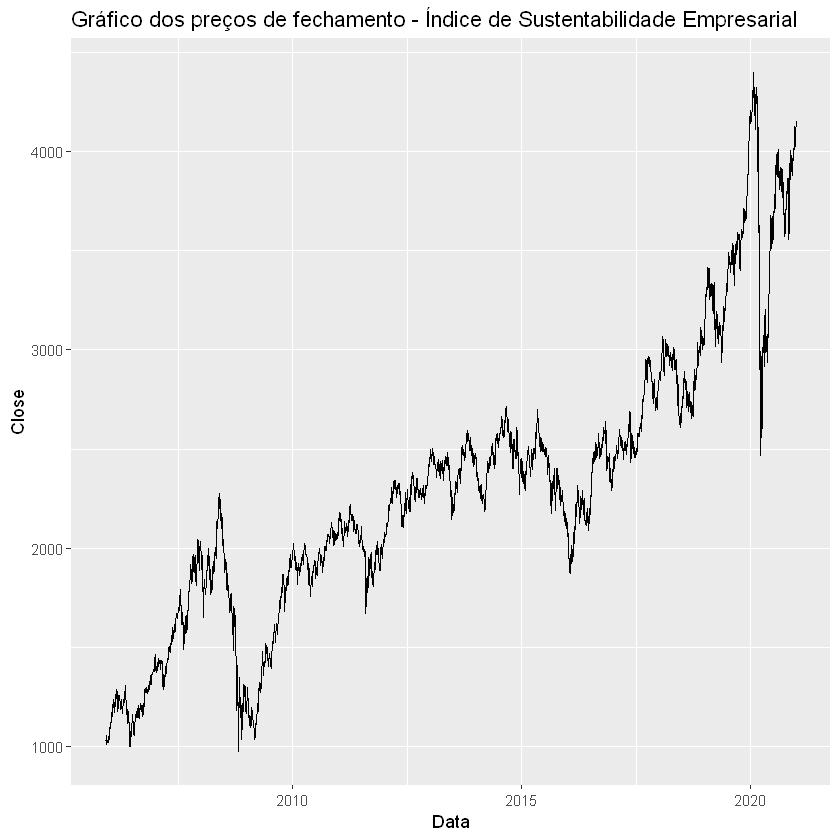

In [10]:
Data <- ise$data
Close <- ise$close

ise %>%
    ggplot() + 
    geom_line(aes(x = Data, y = Close)) +
    ggtitle("Gráfico dos preços de fechamento - Índice de Sustentabilidade Empresarial")

# Etapa 2: Construção da série de direção do atributo "close"

In [11]:
# Biblioteca(s) Necessária(s)
library(quantmod)

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: 'xts'

The following objects are masked from 'package:dplyr':

    first, last

Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.


**Direção da Variável Preço:**

* 1 = up (aumento do preço da ação)

* 0 = down (redução do preço da ação)

In [12]:
direction <- NULL

# Direção = Up quando preço atual > preço anterior de 20 dias
direction[ise$close > lag(ise$close, 20)] <- 1

# Direção = Up quando preço atual < preço anterior de 20 dias
direction[ise$close < lag(ise$close, 20)] <- 0

ise$direction <- direction

In [13]:
colnames(ise)

[1] "data"       "close"      "avg10"      "avg20"      "std10"     
 [6] "std20"      "rsi14"      "rsi5"       "macd1226"   "signal9"   
[11] "histogram9" "macd0720"   "signal5"    "histogram5" "bbands"    
[16] "direction"

**Direção do Retorno da Ação**:

* "up" = aumento do retorno

* "down" = redução do retorno

* "nowhere" = nenhum dos casos anteriores

In [14]:
lagret <- (ise$close - lag(ise$close, 20)) / lag(ise$close, 20)

dirret <- NULL

dirret[lagret < 0.02] <- "down"
dirret[lagret > 0.02] <- "up"
dirret[lagret < 0.02 & lagret > -0.02] <- "nowhere"

ise$dirret <- dirret

In [15]:
colnames(ise)

[1] "data"       "close"      "avg10"      "avg20"      "std10"     
 [6] "std20"      "rsi14"      "rsi5"       "macd1226"   "signal9"   
[11] "histogram9" "macd0720"   "signal5"    "histogram5" "bbands"    
[16] "direction"  "dirret"

# Etapa 3: Identificação e tratamento de *missing values*

## 1. Contabilização de *missing values*

In [16]:
round(prop.table(table(is.na(ise)))*100, digits = 2)

# 0.48% do dataframe corresponde a missing values


FALSE  TRUE 
99.52  0.48 

## 2. Remoção dos *missing values*

In [17]:
isen <- na.omit(ise)

round(prop.table(table(is.na(isen)))*100, digits = 2)

# O dataframe não possui missing values


FALSE 
  100 

In [18]:
head(isen)

# o novo dataframe tem início em 19/01/2006

data,close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands,direction,dirret
2006-01-19,1169,1125.5,1090.75,20.99339,41.35962,80.00000,79.78723,532.1223,704.8302,-172.7080,264.5633,315.4604,-50.89717,165.4385,1,up
2006-01-20,1159,1130.3,1096.10,22.72566,42.97233,76.44444,68.13187,497.6415,659.4553,-161.8138,243.1772,289.7030,-46.52582,171.8893,1,up
2006-01-23,1151,1134.7,1101.20,21.95981,43.14065,69.65174,53.16456,464.3173,616.8597,-152.5424,221.6372,265.4819,-43.84465,172.5626,1,up
2006-01-24,1183,1143.2,1108.45,22.61661,44.13314,70.95238,71.84466,435.4700,577.0157,-141.5458,206.6961,244.1180,-37.42183,176.5326,1,up
2006-01-26,1210,1152.2,1116.60,29.28329,47.13631,75.53648,84.87395,410.0600,540.0830,-130.0230,195.8147,226.3777,-30.56298,188.5452,1,up
2006-01-27,1206,1161.5,1125.10,30.20394,47.16477,71.88940,72.83951,385.1598,505.7015,-120.5417,183.1496,210.0950,-26.94535,188.6591,1,up


# Etapa 4: Análise Exploratória de Dados

## 1. Estatística Descritiva

In [19]:
summary(isen[,-c(1, 16, 17)])

     close            avg10          avg20          std10        
 Min.   : 974.4   Min.   :1042   Min.   :1069   Min.   :  5.984  
 1st Qu.:1893.3   1st Qu.:1894   1st Qu.:1895   1st Qu.: 22.825  
 Median :2290.3   Median :2287   Median :2293   Median : 31.199  
 Mean   :2304.3   Mean   :2301   Mean   :2297   Mean   : 37.408  
 3rd Qu.:2584.6   3rd Qu.:2577   3rd Qu.:2573   3rd Qu.: 44.662  
 Max.   :4399.7   Max.   :4319   Max.   :4273   Max.   :463.502  
     std20            rsi14             rsi5           macd1226       
 Min.   : 10.98   Min.   : 8.495   Min.   :  0.00   Min.   :-413.727  
 1st Qu.: 31.99   1st Qu.:41.842   1st Qu.: 32.79   1st Qu.: -12.456  
 Median : 43.52   Median :53.143   Median : 53.69   Median :   8.160  
 Mean   : 51.19   Mean   :53.293   Mean   : 53.17   Mean   :   7.349  
 3rd Qu.: 58.57   3rd Qu.:64.921   3rd Qu.: 74.59   3rd Qu.:  27.491  
 Max.   :607.73   Max.   :94.812   Max.   :100.00   Max.   : 532.122  
    signal9           histogram9         

A função "summary" não fornece todas as estatísticas descritivas (ex.: desvio padrão, assimetria, curtose...).

Para uma análise mais completa criaremos uma tabela com mais medidas de estatística descritiva.

In [20]:
# Biblioteca(s) Necessária(s)
library(moments)

In [21]:
# Remoção das colunas "data", "direction" e "dirret"
mise <- as.matrix(isen[,-c(1, 16, 17)])    

In [22]:
# Cálculo das medidas de estatística descritiva
n <- ncol(mise)

# Média
mean_ise <- numeric(n)
names(mean_ise) <- colnames(mise)
for (i in 1:n) {
    mean_ise[i] <- mean(mise[,i])
}
mean_ise <- round(mean_ise, digits = 2)

# Desvio Padrão
sd_ise <- numeric(n)
names(sd_ise) <- colnames(mise)
for (i in 1:n) {
    sd_ise[i] <- sd(mise[,i])
}
sd_ise <- round(sd_ise, digits = 2)

# Mínimo
min_ise <- numeric(n)
names(min_ise) <- colnames(mise)
for (i in 1:n) {
    min_ise[i] <- min(mise[,i])
}
min_ise <- round(min_ise, digits = 2)

# 1º Qurtil
q1_ise <- numeric(n)
names(q1_ise) <- colnames(mise)
for (i in 1:n) {
    q1_ise[i] <- quantile(mise[,i], probs = 0.25)
}
q1_ise <- round(q1_ise, digits = 2)

# Mediana
median_ise <- numeric(n)
names(median_ise) <- colnames(mise)
for (i in 1:n) {
    median_ise[i] <- median(mise[,i])
}
median_ise <- round(median_ise, digits = 2)

# 3º Qurtil
q3_ise <- numeric(n)
names(q3_ise) <- colnames(mise)
for (i in 1:n) {
    q3_ise[i] <- quantile(mise[,i], probs = 0.75)
}
q3_ise <- round(q3_ise, digits = 2)

# Máximo
max_ise <- numeric(n)
names(max_ise) <- colnames(mise)
for (i in 1:n) {
    max_ise[i] <- max(mise[,i])
}
max_ise <- round(max_ise, digits = 2)

# Coeficiente de Variação
cv_ise <- numeric(n)
names(cv_ise) <- colnames(mise)
for (i in 1:n) {
    cv_ise[i] <- sd(mise[,i])/mean(mise[,i])
}
cv_ise <- round(cv_ise, digits = 2)

# Assimetria
skew_ise <- numeric(n)
names(skew_ise) <- colnames(mise)
for (i in 1:n) {
    skew_ise[i] <- skewness(mise[,i])
}
skew_ise <- round(skew_ise, digits = 2)

# Curtose
kurt_ise <- numeric(n)
names(kurt_ise) <- colnames(mise)
for (i in 1:n) {
    kurt_ise[i] <- kurtosis(mise[,i])
}
kurt_ise <- round(kurt_ise, digits = 2)

In [23]:
# Montagem da matriz com as medidas de estatística descritiva
stat_data1 <- c(mean_ise, sd_ise, min_ise, q1_ise, median_ise, q3_ise, max_ise, cv_ise, skew_ise, kurt_ise)
stat_ise <- matrix(stat_data1, nrow = 14, ncol = 10)
colnames(stat_ise) <- c("media", "sd", "min", "q1", "median", "q3", "max", "cv", "skew", "kurt")
rownames(stat_ise) <- c("close", "avg10", "avg20", "std10", "std20", "rsi14", "rsi5", "macd1226", "signal9", "histogram9",
                         "macd7205", "signal5", "histogram5", "bbands")
stat_ise

,media,sd,min,q1,median,q3,max,cv,skew,kurt
close,2304.34,683.94,974.44,1893.34,2290.35,2584.59,4399.74,0.30,0.52,3.27
avg10,2300.73,680.79,1042.11,1893.68,2286.57,2577.15,4318.57,0.30,0.51,3.25
avg20,2296.75,677.70,1069.48,1894.77,2292.82,2573.35,4273.13,0.30,0.49,3.22
std10,37.41,28.46,5.98,22.83,31.20,44.66,463.50,0.76,6.64,78.68
std20,51.19,40.76,10.98,31.99,43.52,58.57,607.73,0.80,7.44,84.74
rsi14,53.29,15.67,8.49,41.84,53.14,64.92,94.81,0.29,0.00,2.48
rsi5,53.17,27.03,0.00,32.79,53.69,74.59,100.00,0.51,-0.11,2.14
macd1226,7.35,47.37,-413.73,-12.46,8.16,27.49,532.12,6.45,0.06,32.88
signal9,8.01,51.01,-373.74,-12.56,8.42,26.73,704.83,6.37,2.32,49.72
histogram9,-0.66,15.98,-172.71,-7.38,-0.04,7.05,102.56,-24.19,-2.40,28.30


## 2. Identificação e tratamento de *outliers*

### 2.1. Identificação de *outliers*

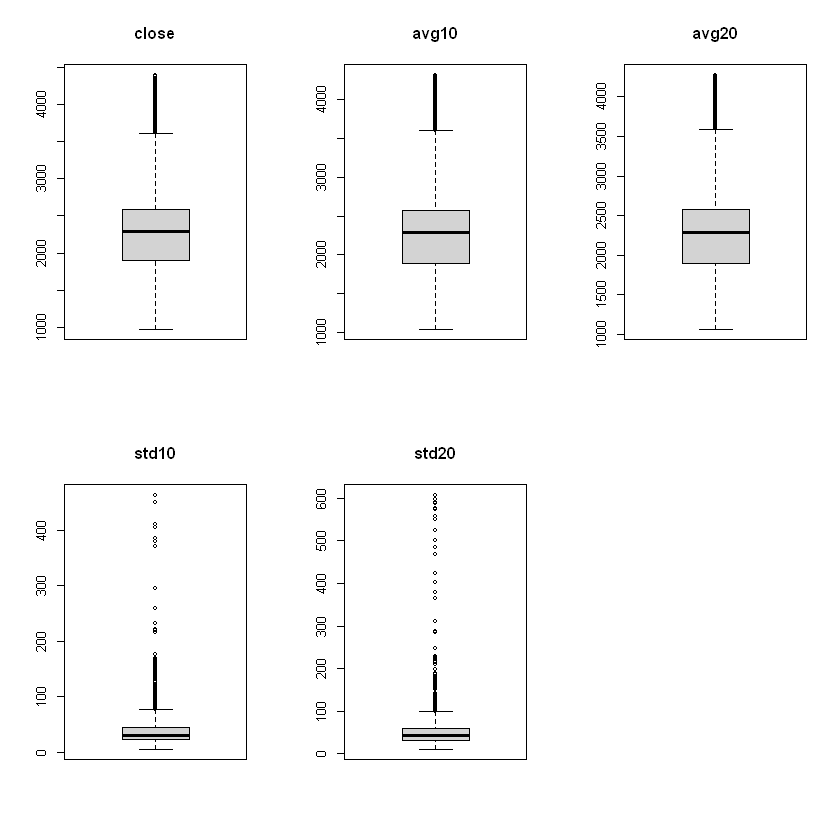

In [24]:
par(mfrow=c(2,3))

boxplot(isen$close, col="light gray",  main="close", border="black", horizontal=FALSE)

boxplot(isen$avg10, col="light gray", main="avg10", border="black", horizontal=FALSE)

boxplot(isen$avg20, col="light gray", main="avg20", border="black", horizontal=FALSE)

boxplot(isen$std10, col="light gray", main="std10", border="black", horizontal=FALSE)

boxplot(isen$std20, col="light gray", main="std20", border="black", horizontal=FALSE)

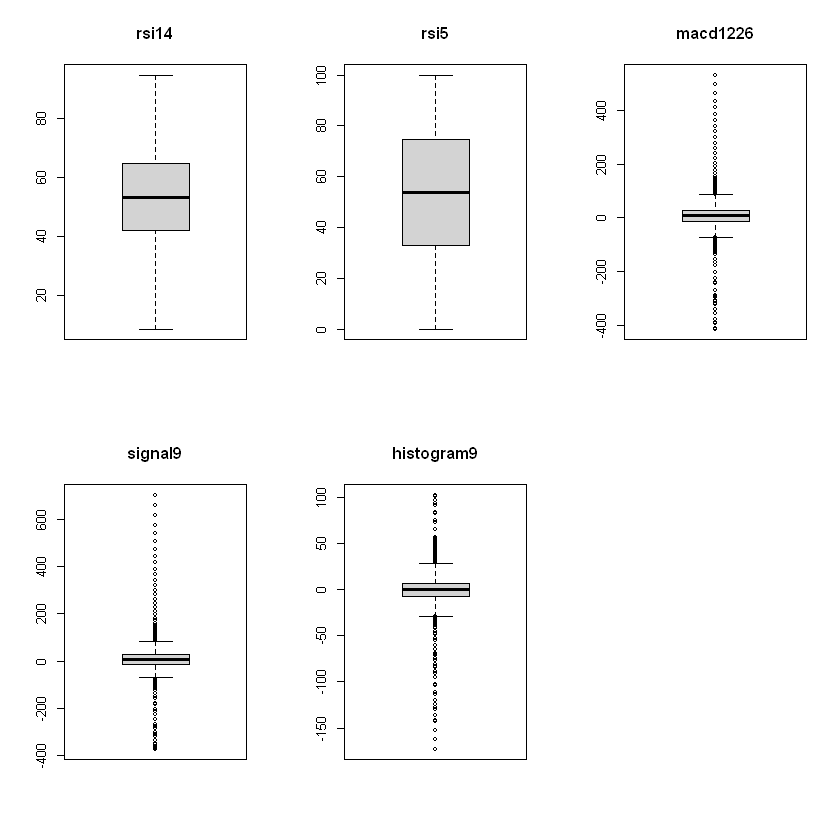

In [25]:
par(mfrow=c(2,3))

boxplot(isen$rsi14, col="light gray", main="rsi14", border="black", horizontal=FALSE)

boxplot(isen$rsi5, col="light gray", main="rsi5", border="black", horizontal=FALSE)

boxplot(isen$macd1226, col="light gray", main="macd1226", border="black", horizontal=FALSE)

boxplot(isen$signal9, col="light gray",  main="signal9", border="black", horizontal=FALSE)

boxplot(isen$histogram9, col="light gray", main="histogram9", border="black", horizontal=FALSE)

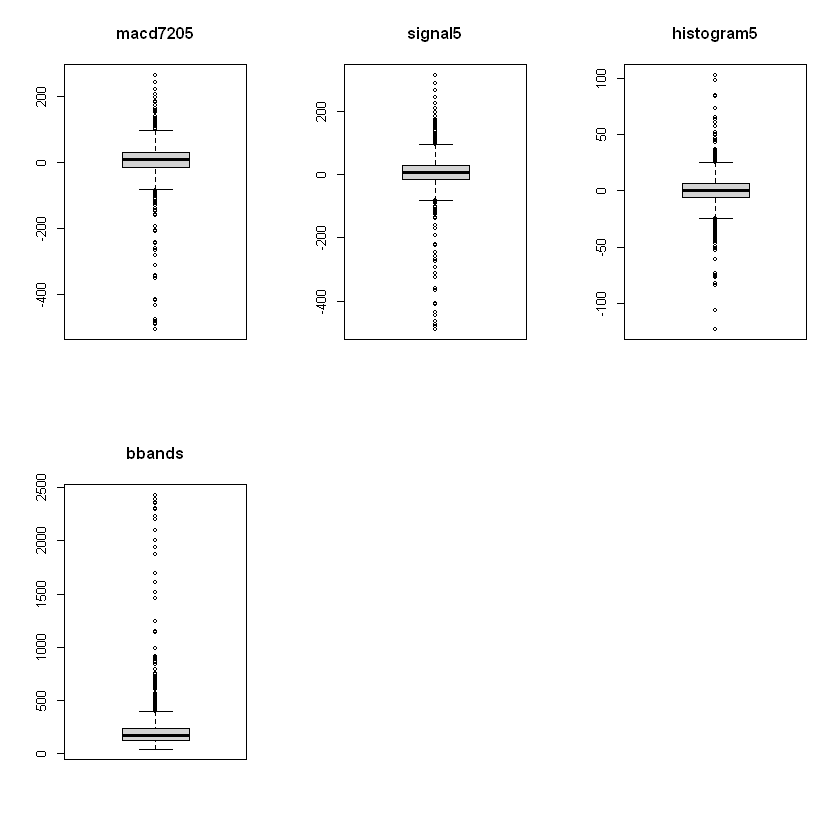

In [26]:
par(mfrow=c(2,3))

boxplot(isen$macd0720, col="light gray", main="macd7205", border="black", horizontal=FALSE)

boxplot(isen$signal5, col="light gray", main="signal5", border="black", horizontal=FALSE)

boxplot(isen$histogram5, col="light gray", main="histogram5", border="black", horizontal=FALSE)

boxplot(isen$bbands, col="light gray", main="bbands", border="black", horizontal=FALSE)

### 2.2. Tratamento de *outliers*

In [27]:
# Biblioteca(s) Necessária(s)
library(outliers)

In [28]:
# Substituição dos outliers pelas medianas dos dados
iseout <- rm.outlier(isen[,-c(1, 16, 17)], fill = TRUE, median = TRUE, opposite = FALSE)

In [29]:
head(iseout)

close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands
1169,1125.5,1090.75,20.99339,41.35962,80.00000,79.78723,8.139799,8.410823,-0.03708359,264.5633,315.4604,-50.89717,165.4385
1159,1130.3,1096.10,22.72566,42.97233,76.44444,68.13187,497.641465,659.455256,-161.81379100,243.1772,289.7030,-46.52582,171.8893
1151,1134.7,1101.20,21.95981,43.14065,69.65174,53.16456,464.317299,616.859668,-152.54236958,221.6372,265.4819,-43.84465,172.5626
1183,1143.2,1108.45,22.61661,44.13314,70.95238,71.84466,435.469963,577.015721,-141.54575885,206.6961,244.1180,-37.42183,176.5326
1210,1152.2,1116.60,29.28329,47.13631,75.53648,84.87395,410.059999,540.083042,-130.02304315,195.8147,226.3777,-30.56298,188.5452
1206,1161.5,1125.10,30.20394,47.16477,71.88940,72.83951,385.159771,505.701474,-120.54170384,183.1496,210.0950,-26.94535,188.6591


In [30]:
iseout <- cbind(isen[,1], iseout, isen[,16:17])

In [31]:
head(iseout)

data,close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands,direction,dirret
2006-01-19,1169,1125.5,1090.75,20.99339,41.35962,80.00000,79.78723,8.139799,8.410823,-0.03708359,264.5633,315.4604,-50.89717,165.4385,1,up
2006-01-20,1159,1130.3,1096.10,22.72566,42.97233,76.44444,68.13187,497.641465,659.455256,-161.81379100,243.1772,289.7030,-46.52582,171.8893,1,up
2006-01-23,1151,1134.7,1101.20,21.95981,43.14065,69.65174,53.16456,464.317299,616.859668,-152.54236958,221.6372,265.4819,-43.84465,172.5626,1,up
2006-01-24,1183,1143.2,1108.45,22.61661,44.13314,70.95238,71.84466,435.469963,577.015721,-141.54575885,206.6961,244.1180,-37.42183,176.5326,1,up
2006-01-26,1210,1152.2,1116.60,29.28329,47.13631,75.53648,84.87395,410.059999,540.083042,-130.02304315,195.8147,226.3777,-30.56298,188.5452,1,up
2006-01-27,1206,1161.5,1125.10,30.20394,47.16477,71.88940,72.83951,385.159771,505.701474,-120.54170384,183.1496,210.0950,-26.94535,188.6591,1,up


## 3. Histogramas

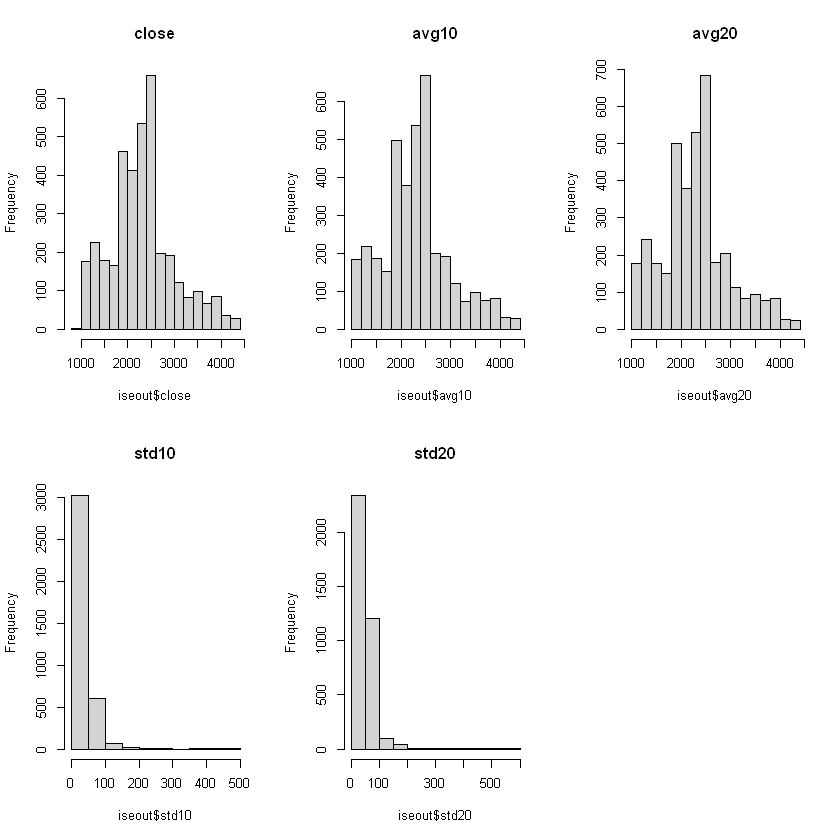

In [32]:
par(mfrow=c(2,3))

hist(iseout$close, col="light gray",  main="close", border="black")

hist(iseout$avg10, col="light gray", main="avg10", border="black")

hist(iseout$avg20, col="light gray", main="avg20", border="black")

hist(iseout$std10, col="light gray", main="std10", border="black")

hist(iseout$std20, col="light gray", main="std20", border="black")

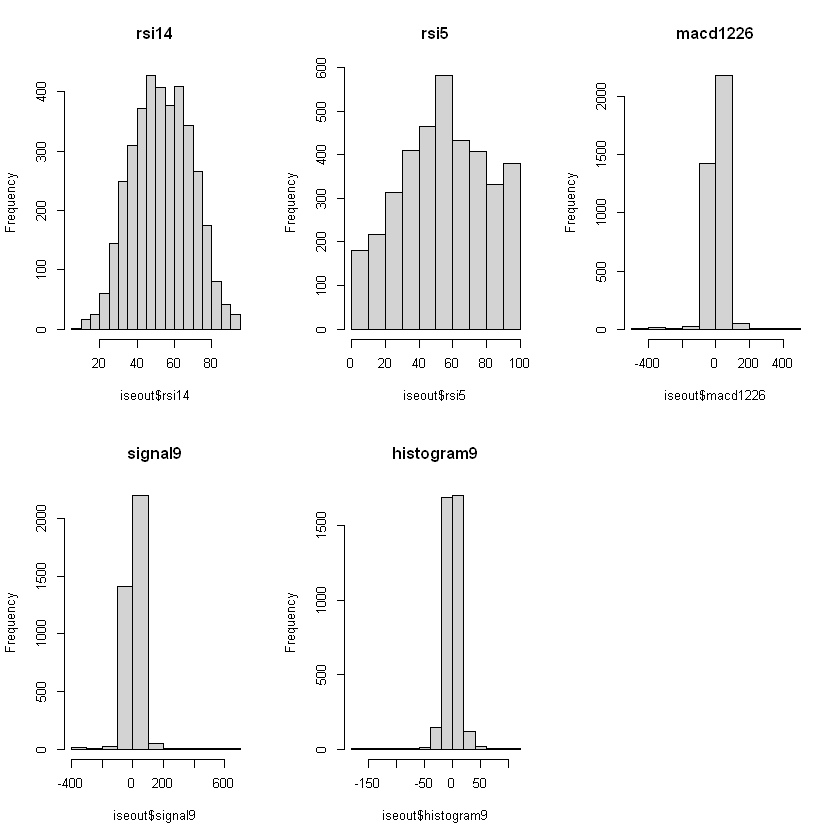

In [33]:
par(mfrow=c(2,3))

hist(iseout$rsi14, col="light gray", main="rsi14", border="black")

hist(iseout$rsi5, col="light gray", main="rsi5", border="black")

hist(iseout$macd1226, col="light gray", main="macd1226", border="black")

hist(iseout$signal9, col="light gray",  main="signal9", border="black")

hist(iseout$histogram9, col="light gray", main="histogram9", border="black")

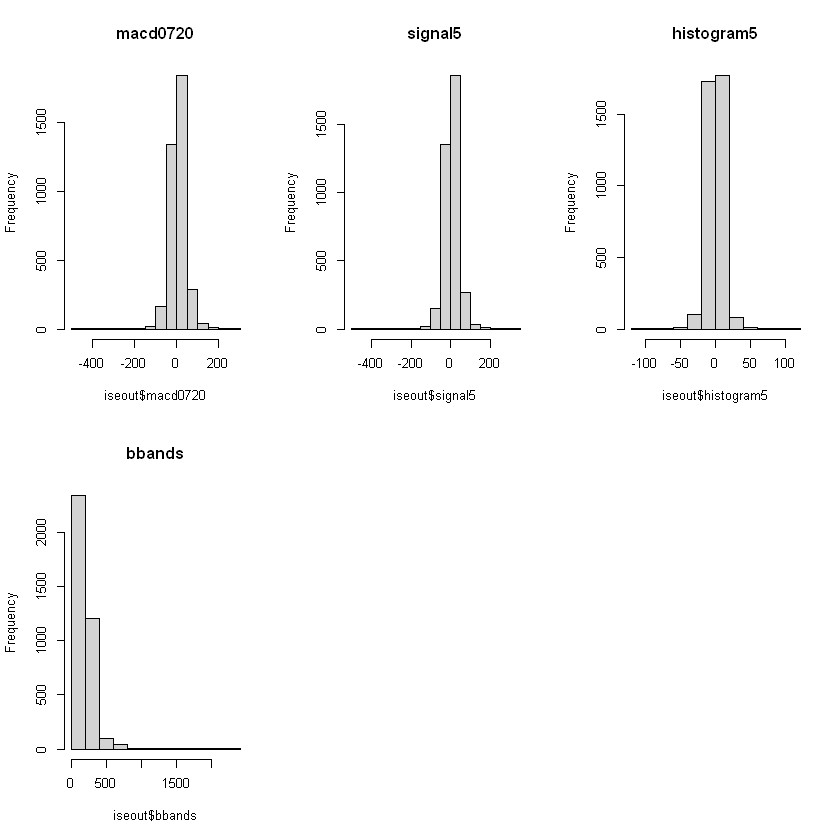

In [34]:
par(mfrow=c(2,3))

hist(iseout$macd0720, col="light gray", main="macd0720", border="black")

hist(iseout$signal5, col="light gray", main="signal5", border="black")

hist(iseout$histogram5, col="light gray", main="histogram5", border="black")

hist(iseout$bbands, col="light gray", main="bbands", border="black")

## 4. Densidades

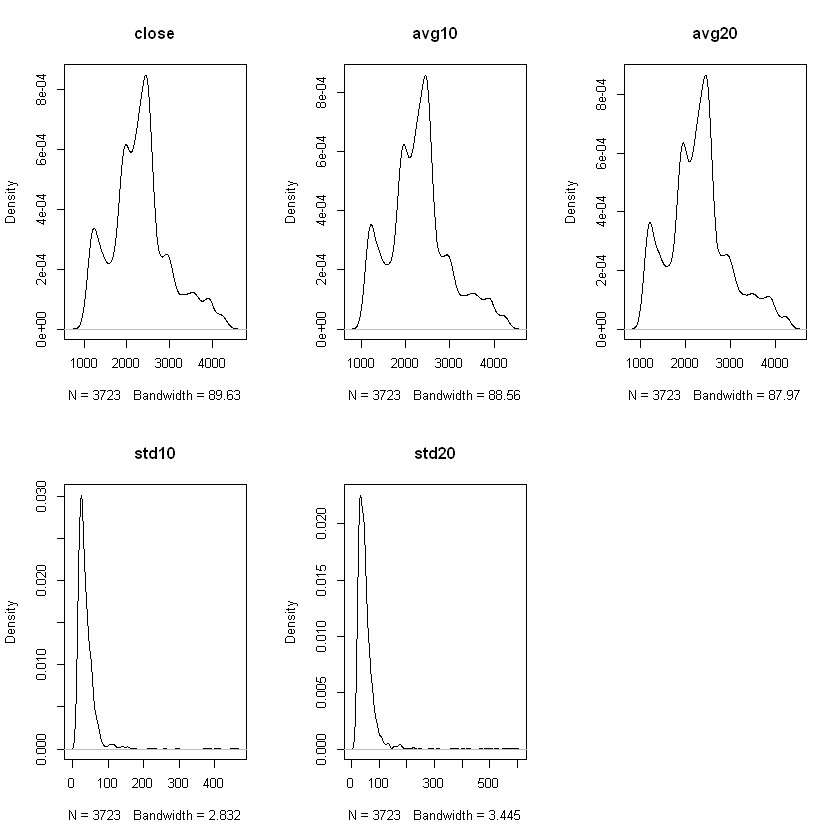

In [35]:
par(mfrow=c(2,3))

den1 <- density(iseout$close)
plot(den1, main = "close")

den2 <- density(iseout$avg10)
plot(den2, main = "avg10")

den3 <- density(iseout$avg20)
plot(den3, main = "avg20")

den4 <- density(iseout$std10)
plot(den4, main = "std10")

den5 <- density(iseout$std20)
plot(den5, main = "std20")

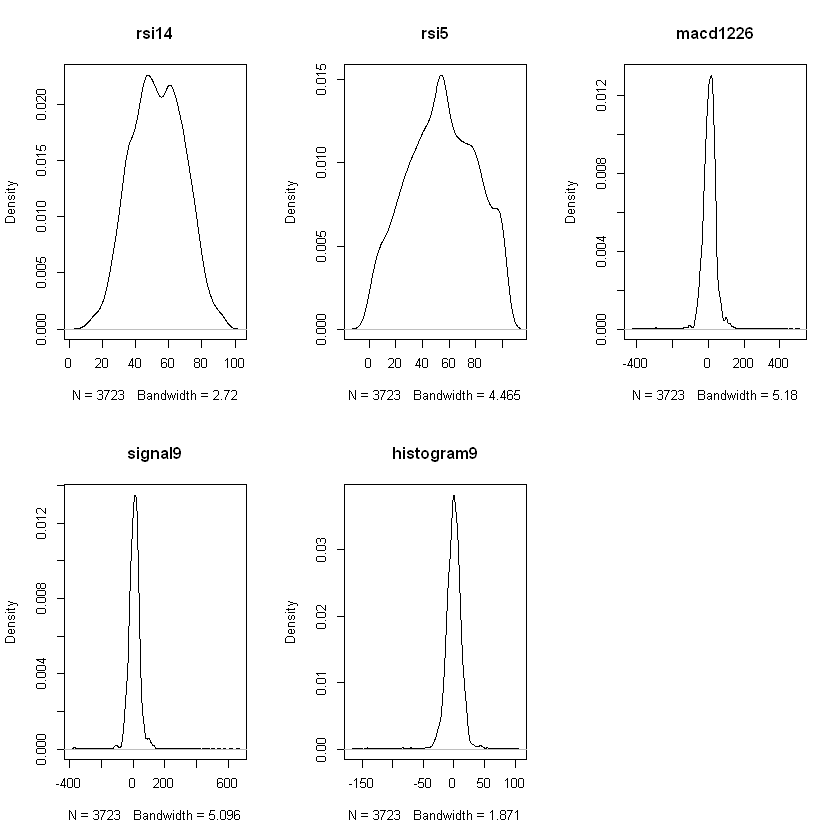

In [36]:
par(mfrow=c(2,3))

den6 <- density(iseout$rsi14)
plot(den6, main = "rsi14")

den7 <- density(iseout$rsi5)
plot(den7, main = "rsi5")

den8 <- density(iseout$macd1226)
plot(den8, main = "macd1226")

den9 <- density(iseout$signal9)
plot(den9, main = "signal9")

den10 <- density(iseout$histogram9)
plot(den10, main = "histogram9")

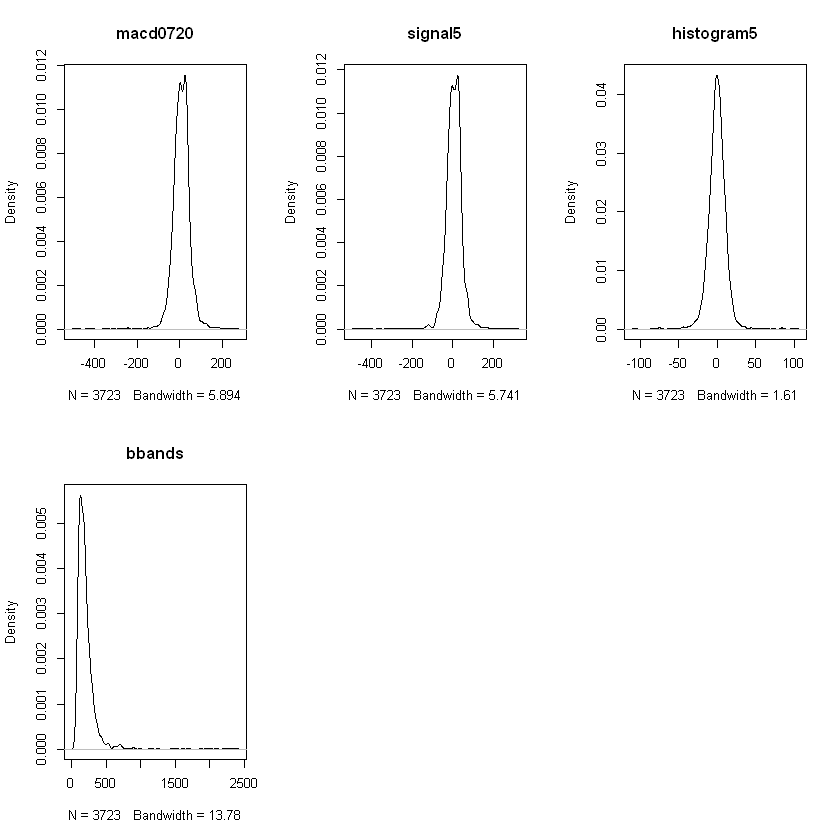

In [37]:
par(mfrow=c(2,3))

den11 <- density(iseout$macd0720)
plot(den11, main = "macd0720")

den12 <- density(iseout$signal5)
plot(den12, main = "signal5")

den13 <- density(iseout$histogram5)
plot(den13, main = "histogram5")

den14 <- density(iseout$bbands)
plot(den14, main = "bbands")

## 5. Correlação

In [38]:
# Biblioteca(s) Necessária(s)
library(corrplot)

Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded


In [39]:
# Cálculo das correlações entre os atributos numéricos
df <- iseout[,c(2:15)]

round(cor(df), digits = 2)

,close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands
close,1.00,0.99,0.99,0.24,0.25,0.11,0.05,0.12,0.09,0.07,0.15,0.15,0.02,0.25
avg10,0.99,1.00,1.00,0.27,0.26,0.06,-0.01,0.09,0.08,0.01,0.10,0.11,-0.04,0.26
avg20,0.99,1.00,1.00,0.29,0.29,0.01,-0.02,0.04,0.04,-0.01,0.04,0.06,-0.04,0.29
std10,0.24,0.27,0.29,1.00,0.77,-0.10,0.00,-0.38,-0.31,-0.15,-0.38,-0.38,-0.02,0.77
std20,0.25,0.26,0.29,0.77,1.00,-0.01,0.00,-0.38,-0.34,-0.06,-0.40,-0.36,0.05,1.00
rsi14,0.11,0.06,0.01,-0.10,-0.01,1.00,0.54,0.55,0.37,0.45,0.69,0.62,0.31,-0.01
rsi5,0.05,-0.01,-0.02,0.00,0.00,0.54,1.00,0.23,0.08,0.43,0.37,0.20,0.65,0.00
macd1226,0.12,0.09,0.04,-0.38,-0.38,0.55,0.23,1.00,0.95,-0.04,0.90,0.94,-0.11,-0.38
signal9,0.09,0.08,0.04,-0.31,-0.34,0.37,0.08,0.95,1.00,-0.35,0.74,0.83,-0.33,-0.34
histogram9,0.07,0.01,-0.01,-0.15,-0.06,0.45,0.43,-0.04,-0.35,1.00,0.33,0.14,0.72,-0.06


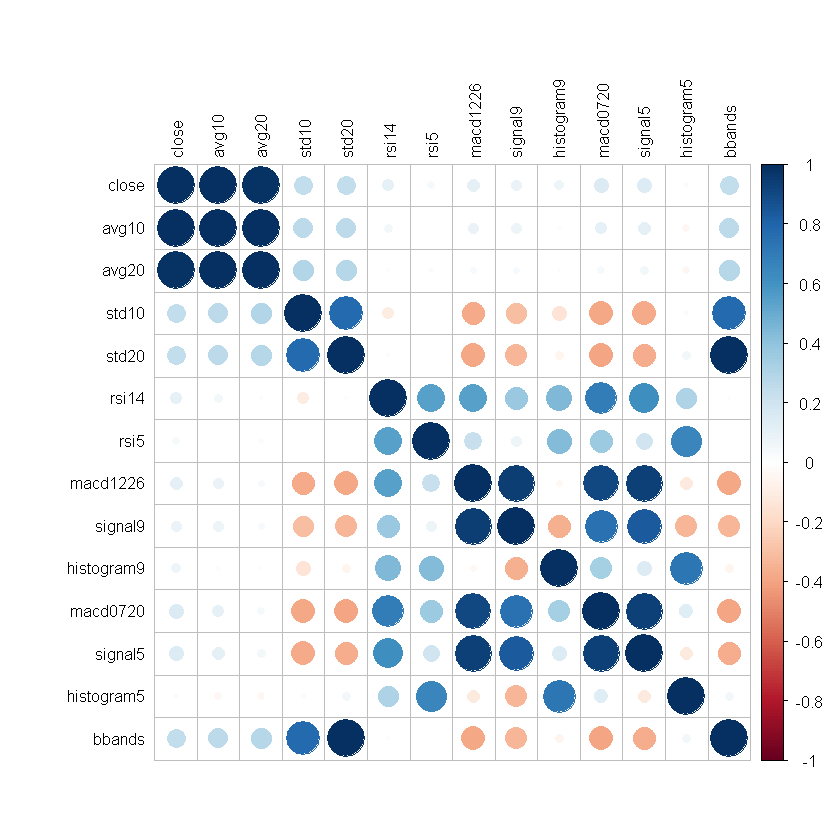

In [40]:
# Matriz de correlação
corrplot(cor(df), method = "circle", tl.col="black", tl.cex=0.8, tl.srt=90)

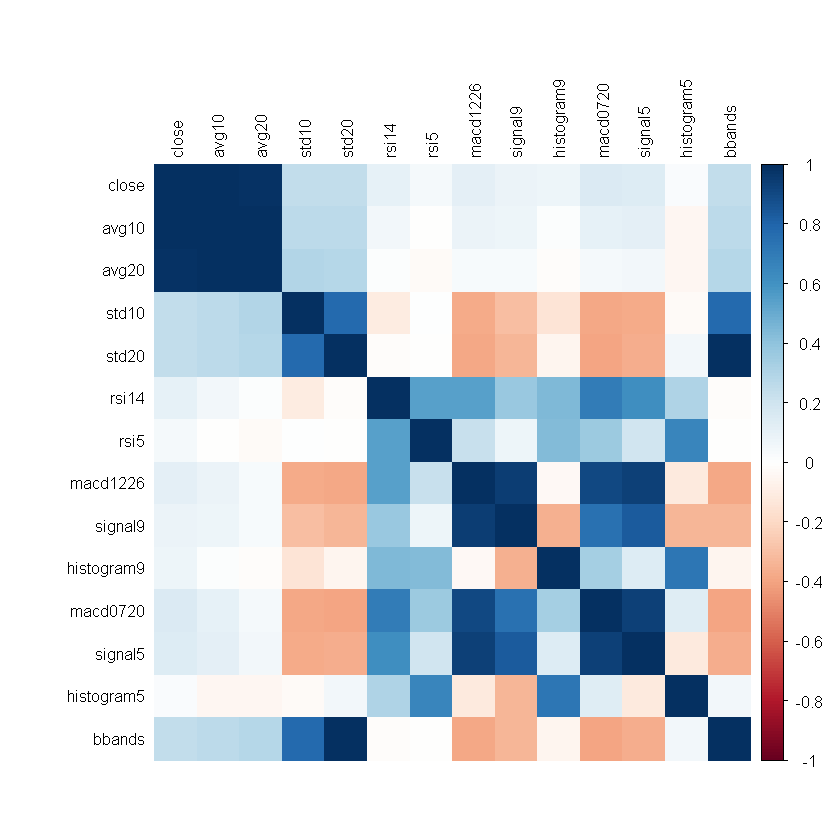

In [41]:
corrplot(cor(df), method = "color", tl.col="black", tl.cex=0.8, tl.srt=90)

## 6. QQ Plot

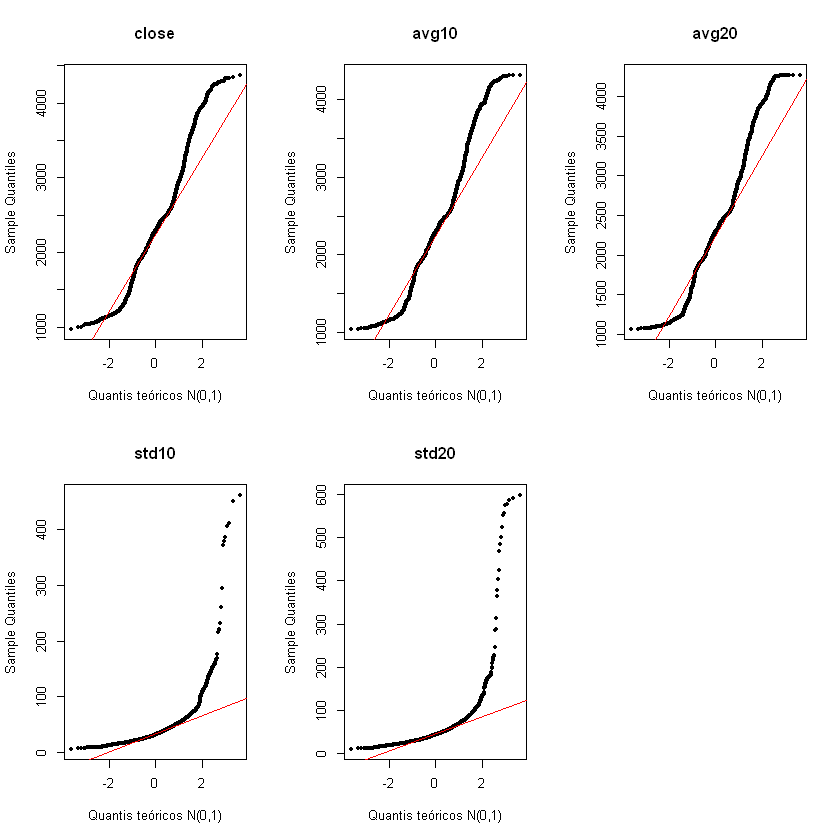

In [42]:
par(mfrow=c(2,3))

qqnorm(iseout$close, main = "close", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(iseout$close, lty = 1, col = "red")

qqnorm(iseout$avg10, main = "avg10", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(iseout$avg10, lty = 1, col = "red")

qqnorm(iseout$avg20, main = "avg20", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(iseout$avg20, lty = 1, col = "red")

qqnorm(iseout$std10, main = "std10", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(iseout$std10, lty = 1, col = "red")

qqnorm(iseout$std20, main = "std20", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(iseout$std20, lty = 1, col = "red")

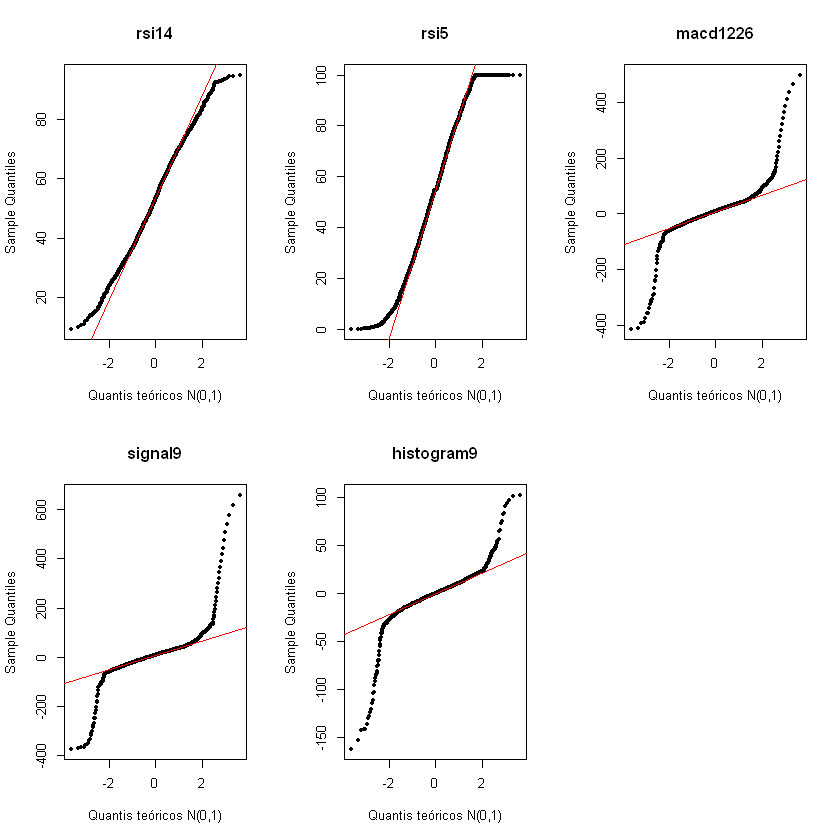

In [43]:
par(mfrow=c(2,3))

qqnorm(iseout$rsi14, main = "rsi14", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(iseout$rsi14, lty = 1, col = "red")

qqnorm(iseout$rsi5, main = "rsi5", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(iseout$rsi5, lty = 1, col = "red")

qqnorm(iseout$macd1226, main = "macd1226", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(iseout$macd1226, lty = 1, col = "red")

qqnorm(iseout$signal9, main = "signal9", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(iseout$signal9, lty = 1, col = "red")

qqnorm(iseout$histogram9, main = "histogram9", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(iseout$histogram9, lty = 1, col = "red")

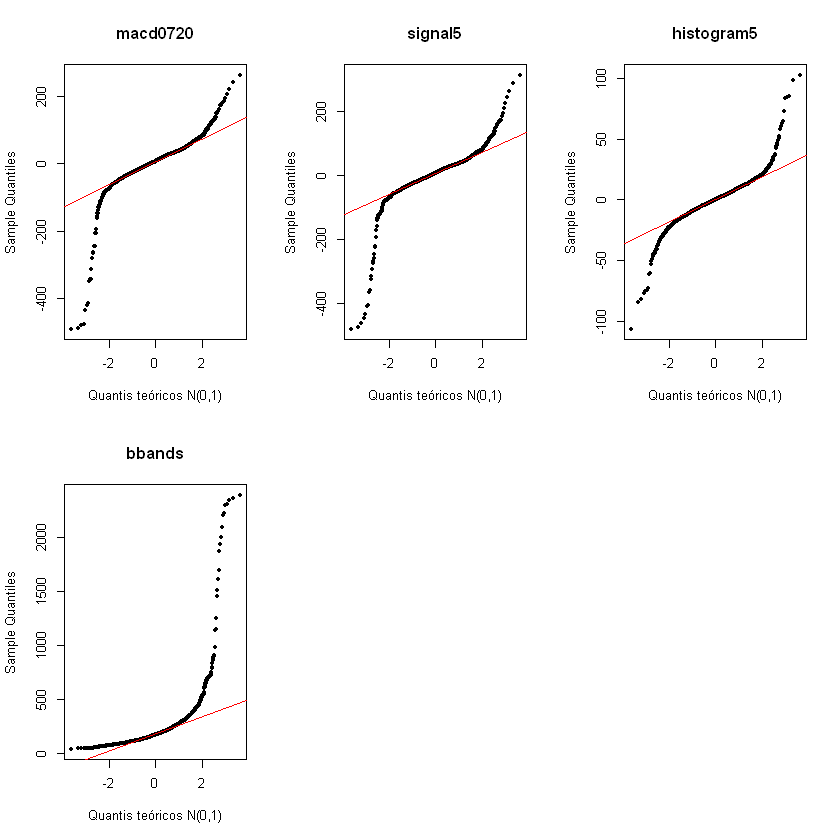

In [44]:
par(mfrow=c(2,3))

qqnorm(iseout$macd0720, main = "macd0720", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(iseout$macd0720, lty = 1, col = "red")

qqnorm(iseout$signal5, main = "signal5", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(iseout$signal5, lty = 1, col = "red")

qqnorm(iseout$histogram5, main = "histogram5", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(iseout$histogram5, lty = 1, col = "red")

qqnorm(iseout$bbands, main = "bbands", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(iseout$bbands, lty = 1, col = "red")

# Etapa 6: Preprocessamento dos Dados

## 1. Normalização - Método Min-Max

In [45]:
# Função para normalização dos dados
normalize_minmax = function(x) {
    return ((x - min(x)) / (max(x) - min(x)))
}

In [46]:
isemm <- normalize_minmax(iseout[,-c(1, 16, 17)])
head(isemm)

close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands
0.3411508,0.3322137,0.3250743,0.1052922,0.1094764,0.1174151,0.1173714,0.1026514,0.1027071,0.10097144,0.1553337,0.1657906,0.09052221,0.1349685
0.3390963,0.3331999,0.3261734,0.1056481,0.1098077,0.1166846,0.1149768,0.2032198,0.2364645,0.06773432,0.1509400,0.1604987,0.09142030,0.1362938
0.3374527,0.3341038,0.3272212,0.1054907,0.1098423,0.1152890,0.1119017,0.1963733,0.2277132,0.06963914,0.1465146,0.1555225,0.09197115,0.1364321
0.3440271,0.3358502,0.3287108,0.1056257,0.1100462,0.1155563,0.1157396,0.1904466,0.2195273,0.07189840,0.1434449,0.1511332,0.09329072,0.1372478
0.3495743,0.3376992,0.3303852,0.1069953,0.1106632,0.1164981,0.1184165,0.1852261,0.2119394,0.07426575,0.1412093,0.1474885,0.09469988,0.1397158
0.3487525,0.3396099,0.3321315,0.1071845,0.1106691,0.1157488,0.1159440,0.1801104,0.2048757,0.07621370,0.1386073,0.1441432,0.09544312,0.1397392


In [47]:
data <- iseout$data
direction <- iseout$direction
dirret <- iseout$dirret

isemm <- cbind(data, isemm, direction, dirret)
head(isemm)

data,close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands,direction,dirret
2006-01-19,0.3411508,0.3322137,0.3250743,0.1052922,0.1094764,0.1174151,0.1173714,0.1026514,0.1027071,0.10097144,0.1553337,0.1657906,0.09052221,0.1349685,1,up
2006-01-20,0.3390963,0.3331999,0.3261734,0.1056481,0.1098077,0.1166846,0.1149768,0.2032198,0.2364645,0.06773432,0.1509400,0.1604987,0.09142030,0.1362938,1,up
2006-01-23,0.3374527,0.3341038,0.3272212,0.1054907,0.1098423,0.1152890,0.1119017,0.1963733,0.2277132,0.06963914,0.1465146,0.1555225,0.09197115,0.1364321,1,up
2006-01-24,0.3440271,0.3358502,0.3287108,0.1056257,0.1100462,0.1155563,0.1157396,0.1904466,0.2195273,0.07189840,0.1434449,0.1511332,0.09329072,0.1372478,1,up
2006-01-26,0.3495743,0.3376992,0.3303852,0.1069953,0.1106632,0.1164981,0.1184165,0.1852261,0.2119394,0.07426575,0.1412093,0.1474885,0.09469988,0.1397158,1,up
2006-01-27,0.3487525,0.3396099,0.3321315,0.1071845,0.1106691,0.1157488,0.1159440,0.1801104,0.2048757,0.07621370,0.1386073,0.1441432,0.09544312,0.1397392,1,up


## 2. Normalização - Método Z-Score

In [48]:
# Função para normalização dos dados
normalize_zscore = function(x) {
    return ((x - mean(x)) / sd(x))
}

In [49]:
m <- as.matrix(iseout[,-c(1, 16, 17)]) 

isez <- normalize_zscore(m)

head(isez)

close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands
0.6571943,0.6129170,0.5775461,-0.5113247,-0.4905946,-0.4512638,-0.4514804,-0.52440799,-0.52413213,-0.5327310,-0.2634028,-0.2115962,-0.5844998,-0.3642987
0.6470156,0.6178028,0.5829917,-0.5095615,-0.4889531,-0.4548829,-0.4633440,-0.02615998,0.13854508,-0.6973983,-0.2851710,-0.2378138,-0.5800504,-0.3577326
0.6388727,0.6222814,0.5881829,-0.5103410,-0.4887818,-0.4617970,-0.4785787,-0.06007958,0.09518840,-0.6879612,-0.3070958,-0.2624678,-0.5773213,-0.3570473
0.6714444,0.6309333,0.5955624,-0.5096725,-0.4877715,-0.4604731,-0.4595649,-0.08944236,0.05463252,-0.6767681,-0.3223039,-0.2842134,-0.5707837,-0.3530064
0.6989269,0.6400941,0.6038580,-0.5028867,-0.4847147,-0.4558071,-0.4463028,-0.11530634,0.01703994,-0.6650395,-0.3333797,-0.3022706,-0.5638023,-0.3407791
0.6948554,0.6495603,0.6125099,-0.5019496,-0.4846857,-0.4595193,-0.4585522,-0.14065148,-0.01795596,-0.6553888,-0.3462711,-0.3188443,-0.5601200,-0.3406632


In [50]:
data <- iseout$data
direction <- iseout$direction
dirret <- iseout$dirret

isez <- data.frame(isez)

isez <- cbind(data, isez, direction, dirret)
head(isez)

data,close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands,direction,dirret
2006-01-19,0.6571943,0.6129170,0.5775461,-0.5113247,-0.4905946,-0.4512638,-0.4514804,-0.52440799,-0.52413213,-0.5327310,-0.2634028,-0.2115962,-0.5844998,-0.3642987,1,up
2006-01-20,0.6470156,0.6178028,0.5829917,-0.5095615,-0.4889531,-0.4548829,-0.4633440,-0.02615998,0.13854508,-0.6973983,-0.2851710,-0.2378138,-0.5800504,-0.3577326,1,up
2006-01-23,0.6388727,0.6222814,0.5881829,-0.5103410,-0.4887818,-0.4617970,-0.4785787,-0.06007958,0.09518840,-0.6879612,-0.3070958,-0.2624678,-0.5773213,-0.3570473,1,up
2006-01-24,0.6714444,0.6309333,0.5955624,-0.5096725,-0.4877715,-0.4604731,-0.4595649,-0.08944236,0.05463252,-0.6767681,-0.3223039,-0.2842134,-0.5707837,-0.3530064,1,up
2006-01-26,0.6989269,0.6400941,0.6038580,-0.5028867,-0.4847147,-0.4558071,-0.4463028,-0.11530634,0.01703994,-0.6650395,-0.3333797,-0.3022706,-0.5638023,-0.3407791,1,up
2006-01-27,0.6948554,0.6495603,0.6125099,-0.5019496,-0.4846857,-0.4595193,-0.4585522,-0.14065148,-0.01795596,-0.6553888,-0.3462711,-0.3188443,-0.5601200,-0.3406632,1,up


# Etapa 7: Seleção de atributos

In [51]:
# Biblioteca(s) Necessária(s)
library(caret)

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice


## 1. Seleção dos atributos com maiores correlações 

In [52]:
# Matriz de correlação
y <- iseout[,-c(1, 16, 17)]

corrise <- cor(y)

# Seleção dos atributos que são altamente correlacionados (isealmente > 0.75)
highcorrise <- findCorrelation(corrise, cutoff = 0.5)

# Exibição dos índices que possuem correlação elevada 
print(highcorrise)

[1] 11 12  8  5  4  1  2 10  7


* índice 11: macd0720

* índice 12: signal5

* índice 8: macd1226

* índice 5: std20

* índice 4: std10

* índice 1: close

* índice 2: avg10

* índice 10: histogram9

* índice 7: rsi5

## 2. Seleção automática de atributos

Método utilizado para seleção automática dos atributos: *Recursive Feature Elimination* (RFE).

In [53]:
# Definição do controle por meio de uma função de seleção random forest
control <- rfeControl(functions=rfFuncs, method="cv", number=10)

In [54]:
z <- iseout[,-c(1, 17)]

resultise <- rfe(direction~., z, rfeControl=control)

Warning message in randomForest.default(x, y, importance = TRUE, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"Warning message in randomForest.default(x, y, importance = TRUE, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"Warning message in randomForest.default(x, y, importance = TRUE, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"Warning message in randomForest.default(x, y, importance = TRUE, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"Warning message in randomForest.default(x, y, importance = TRUE, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"Warning message in randomForest.default(x, y, importance = TRUE, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"Warning message in randomForest.default(x, y, 

In [55]:
# Resultado da seleção
print(resultise)


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables   RMSE Rsquared    MAE  RMSESD RsquaredSD   MAESD Selected
         4 0.2876   0.6610 0.1616 0.01744    0.04308 0.00988         
         8 0.2767   0.6857 0.1555 0.01819    0.04530 0.01021         
        14 0.2634   0.7156 0.1472 0.01746    0.04186 0.01065        *

The top 5 variables (out of 14):
   macd0720, signal5, rsi14, macd1226, std10



In [56]:
# Lista dos atributos escolhidos (de acordo com a variável de interesse)
predictors(resultise)

[1] "macd0720"   "signal5"    "rsi14"      "macd1226"   "std10"     
 [6] "signal9"    "histogram5" "histogram9" "rsi5"       "avg10"     
[11] "avg20"      "close"      "bbands"     "std20"

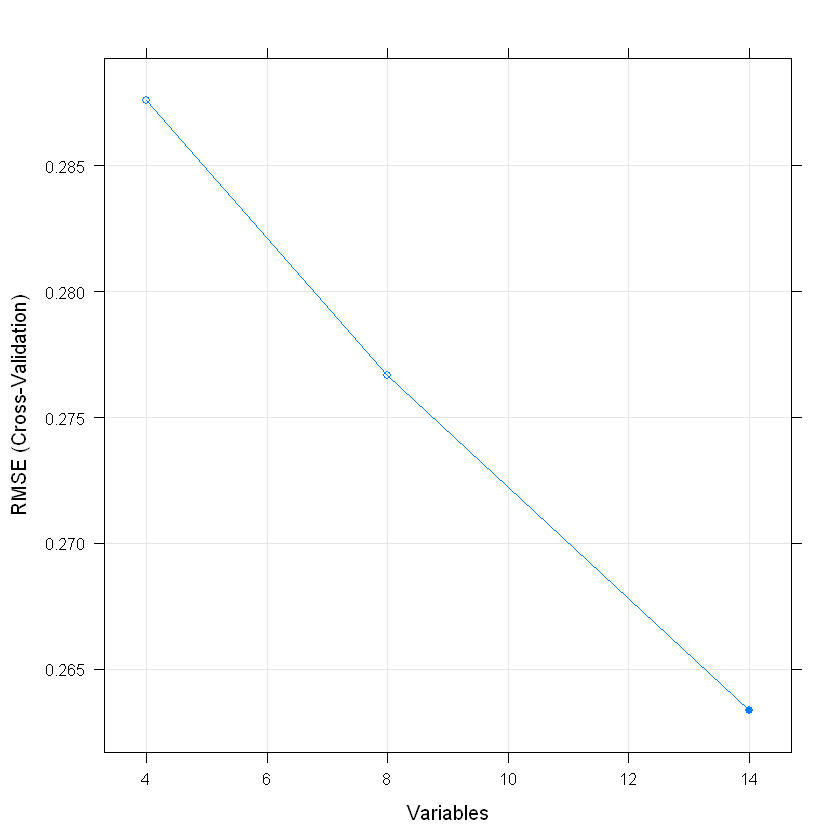

In [57]:
plot(resultise, type=c("g", "o"))

## 3. Classificação e seleção de atributos com base no algoritmo de random forest

In [58]:
# Biblioteca(s) Necessária(s)
library(Boruta)

Warning message:
"package 'Boruta' was built under R version 3.6.3"

In [59]:
# Objeto de armazenamento dos resultados
iseboruta_output <- Boruta(direction ~., data = z, doTrace = 0)
names(iseboruta_output)

[1] "finalDecision" "ImpHistory"    "pValue"        "maxRuns"      
 [5] "light"         "mcAdj"         "timeTaken"     "roughfixed"   
 [9] "call"          "impSource"

In [60]:
# Obtenção das variáveis de significância
iseboruta_signif <- getSelectedAttributes(iseboruta_output, withTentative = TRUE)
print(iseboruta_signif)

 [1] "close"      "avg10"      "avg20"      "std10"      "std20"     
 [6] "rsi14"      "rsi5"       "macd1226"   "signal9"    "histogram9"
[11] "macd0720"   "signal5"    "histogram5" "bbands"    


In [61]:
# Correção preliminar
iseroughfixmod <- TentativeRoughFix(iseboruta_output)
iseboruta_signif2 <- getSelectedAttributes(iseroughfixmod)
print(iseboruta_signif2)

Warning message in TentativeRoughFix(iseboruta_output):
"There are no Tentative attributes! Returning original object."

 [1] "close"      "avg10"      "avg20"      "std10"      "std20"     
 [6] "rsi14"      "rsi5"       "macd1226"   "signal9"    "histogram9"
[11] "macd0720"   "signal5"    "histogram5" "bbands"    


In [62]:
# Score de importância das variáveis
iseboruta_imp <- attStats(iseroughfixmod)
iseboruta_imp2 <- iseboruta_imp[iseboruta_imp$decision != 'Rejected', c('meanImp', 'decision')]

# Exibição por ordem decrescente de importância
head(iseboruta_imp2[order(-iseboruta_imp2),])

Warning message in Ops.factor(left):
"'-' not meaningful for factors"

,meanImp,decision
macd0720,46.75348,Confirmed
signal5,35.56201,Confirmed
rsi14,29.85940,Confirmed
macd1226,28.79501,Confirmed
signal9,24.94583,Confirmed
rsi5,22.18892,Confirmed


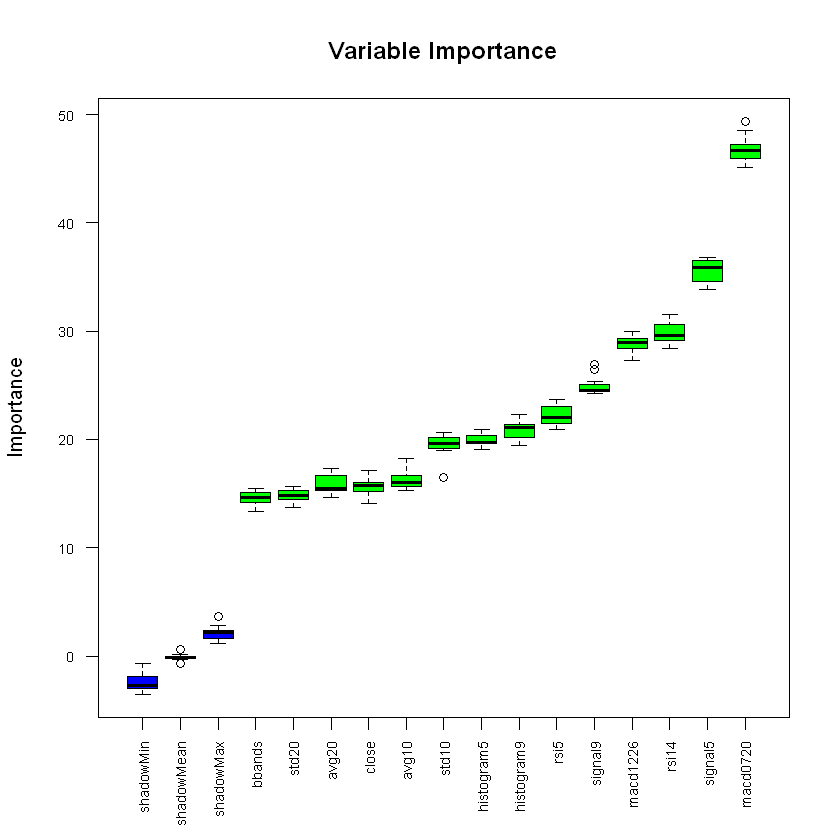

In [63]:
# Análise Gráfica
plot(iseboruta_output, cex.axis=.7, las=2, xlab="", main="Variable Importance")  

Colunas em verde são as variáveis "confirmadas" e as barras em azul representam (ShadowMax e ShadowMin => utilizados no algoritmo para decidir se uma variável é importante ou não).

# Etapa 8: Predição

## 1. Separação dos dados de treino e teste

In [64]:
# Biblioteca(s) Necessária(s)
library(keras)

Warning message:
"package 'keras' was built under R version 3.6.3"

**Dataframe "BVSP"**

In [65]:
# Determinação do tamanho da amostra
isesplit <- sample(2, nrow(isez), replace=TRUE, prob=c(0.70, 0.30))

# 0.70 de probabilidade dos dados como de treino e com 0.30 de probabilidade dos dados como de teste

In [66]:
# Separação das amostras (índice 1 = treino e indice 2 = teste)
isetrain <- isez[isesplit == 1,]
isetest <- isez[isesplit == 2,]

In [67]:
dim(isez)
dim(isetrain)
dim(isetest)

[1] 3723   17

[1] 2587   17

[1] 1136   17

## 2. Regressão Logística

In [68]:
# Criação de uma fórmula que tem "Direction" como variável dependente e todas as demais como variáveis independentes
formula <- paste("direction ~.", sep = "")

**Construção do modelo**

In [69]:
# Utilização de um modelo linear generalizado para ajustar o modelo
isemodel <- glm(formula, isetrain[,-17], family = binomial)

summary(isemodel) 

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = formula, family = binomial, data = isetrain[, -17])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2012  -0.1861   0.0161   0.2339   4.1929  

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.735e+05  1.198e+06  -0.145  0.88482    
data         4.573e-09  1.593e-09   2.871  0.00409 ** 
close        7.713e+00  1.028e+00   7.502 6.28e-14 ***
avg10        7.172e+01  7.785e+00   9.212  < 2e-16 ***
avg20       -8.041e+01  7.895e+00 -10.186  < 2e-16 ***
std10        1.616e+01  8.427e+00   1.917  0.05519 .  
std20       -1.872e+01  8.924e+00  -2.097  0.03597 *  
rsi14       -7.213e+01  1.304e+01  -5.530 3.20e-08 ***
rsi5         3.448e+00  5.427e+00   0.635  0.52515    
macd1226     3.256e+05  2.249e+06   0.145  0.88488    
signal9     -3.258e+05  2.249e+06  -0.145  0.88480    
histogram9  -3.262e+05  2.249e+06  -0.145  0.88466    
macd0720     1.803e+02  1.226e+01  14.705 

In [70]:
# Ajustamento dos valores no mesmo conjunto de dados utilizados para estimar o valor melhor ajustado.
isepred <- predict(isemodel, isetrain[,-17])

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

**Conversão dos valores ajustados em probabilidade**

In [71]:
# Conversão do output em uma forma probabilistica, que estará no intervalo [0,1]
iseprob <- 1 / (1+exp(-(isepred)))

head(iseprob)   

1         2         4         5         6         7 
0.9999987 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000

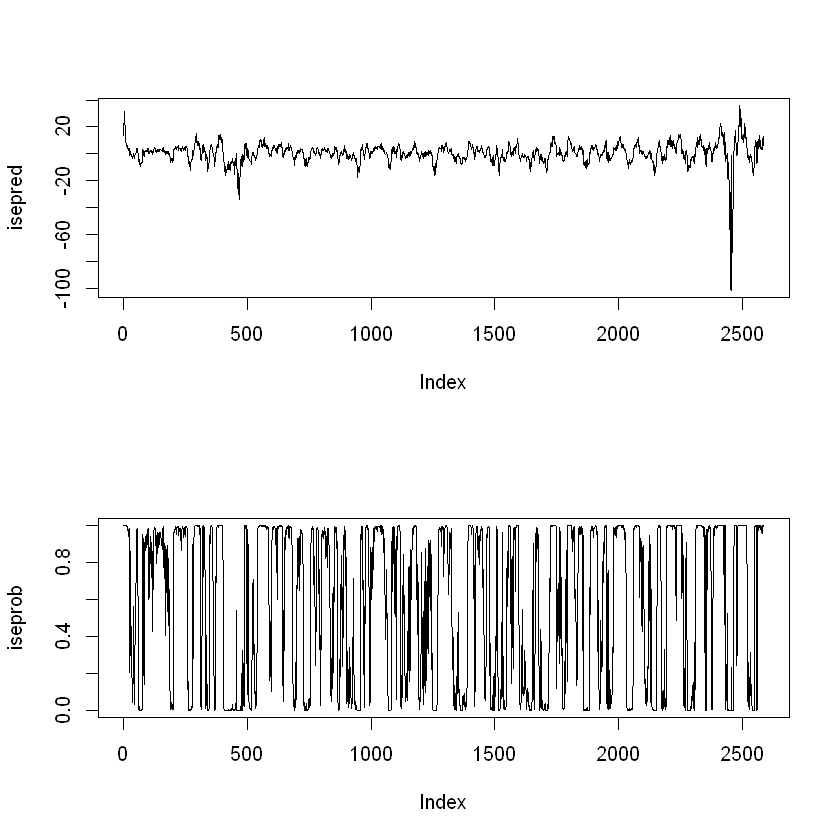

In [72]:
# Análise gráfica
par(mfrow = c(2,1))              

# Figura 1: previsão do modelo
plot(isepred, type = "l")           

# Figura 2: probabilidade do modelo
plot(iseprob, type = "l")

**Classificação das probabilidades em 2 classes (1 = direção "Up" e 0 = direção "Down")**

In [73]:
isepred_directionin <- NULL

# Direção para cima (Up)
isepred_directionin[iseprob > 0.5] <- 1    

# Direção para baixo (Down)
isepred_directionin[iseprob <= 0.5] <- 0

**Verificação da acurácia do modelo**

In [74]:
# Biblioteca(s) Necessária(s)
library(caret)
library(e1071)

Warning message:
"package 'e1071' was built under R version 3.6.3"
Attaching package: 'e1071'

The following objects are masked from 'package:moments':

    kurtosis, moment, skewness



In [75]:
# Matriz de Confusão
confusionMatrix(table(isepred_directionin, isetrain$direction))

Confusion Matrix and Statistics

                   
isepred_directionin    0    1
                  0  980  102
                  1  121 1384
                                          
               Accuracy : 0.9138          
                 95% CI : (0.9023, 0.9243)
    No Information Rate : 0.5744          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8233          
                                          
 Mcnemar's Test P-Value : 0.2281          
                                          
            Sensitivity : 0.8901          
            Specificity : 0.9314          
         Pos Pred Value : 0.9057          
         Neg Pred Value : 0.9196          
             Prevalence : 0.4256          
         Detection Rate : 0.3788          
   Detection Prevalence : 0.4182          
      Balanced Accuracy : 0.9107          
                                          
       'Positive' Class : 0             

**Curva ROC 1**

In [76]:
# Biblioteca(s) Necessária(s)
library(PRROC)

Warning message:
"package 'PRROC' was built under R version 3.6.3"

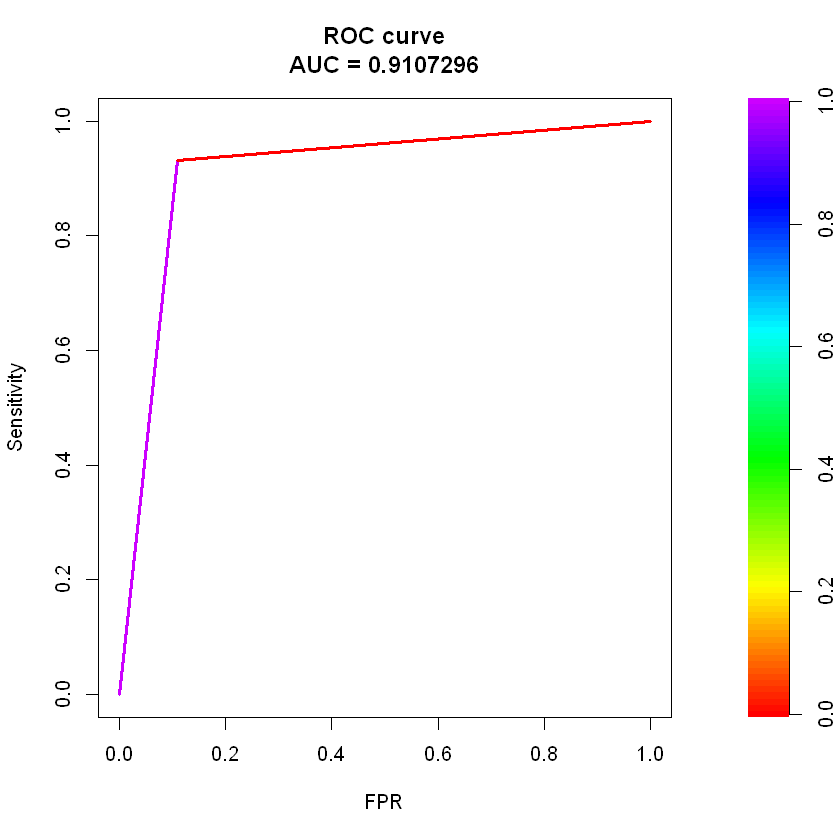

In [77]:
plot(roc.curve(scores.class0 = isepred_directionin, weights.class0=isetrain$direction, curve=TRUE))

**Curva ROC 2**

In [78]:
# Biblioteca(s) Necessária(s)
library(precrec)

Warning message:
"package 'precrec' was built under R version 3.6.3"

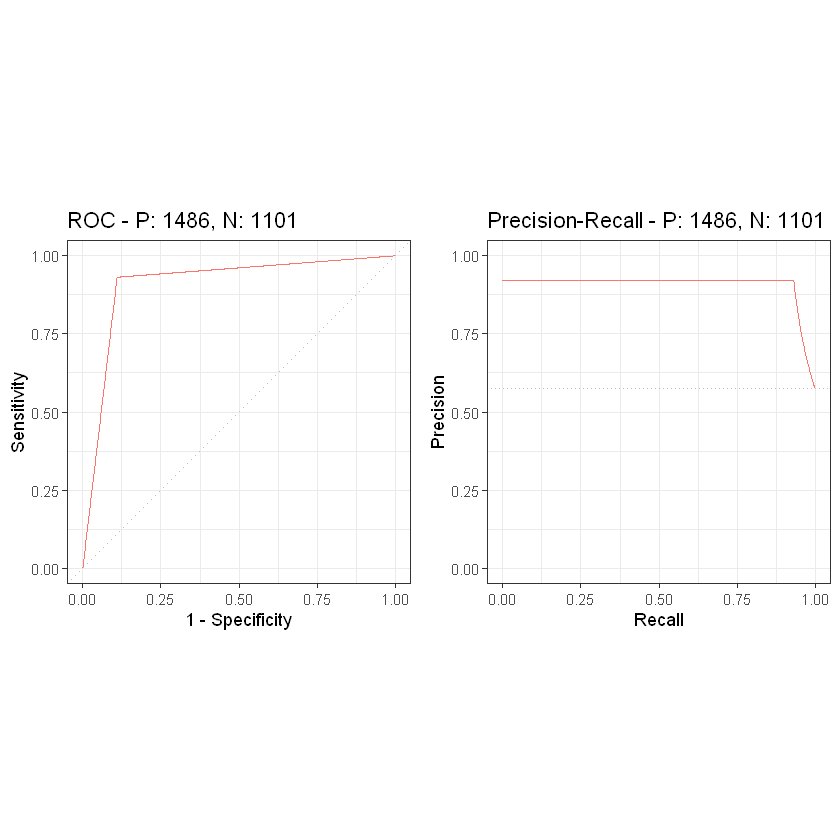

In [79]:
iseprecrecin <- evalmod(scores = isepred_directionin, labels = isetrain$direction)
autoplot(iseprecrecin)

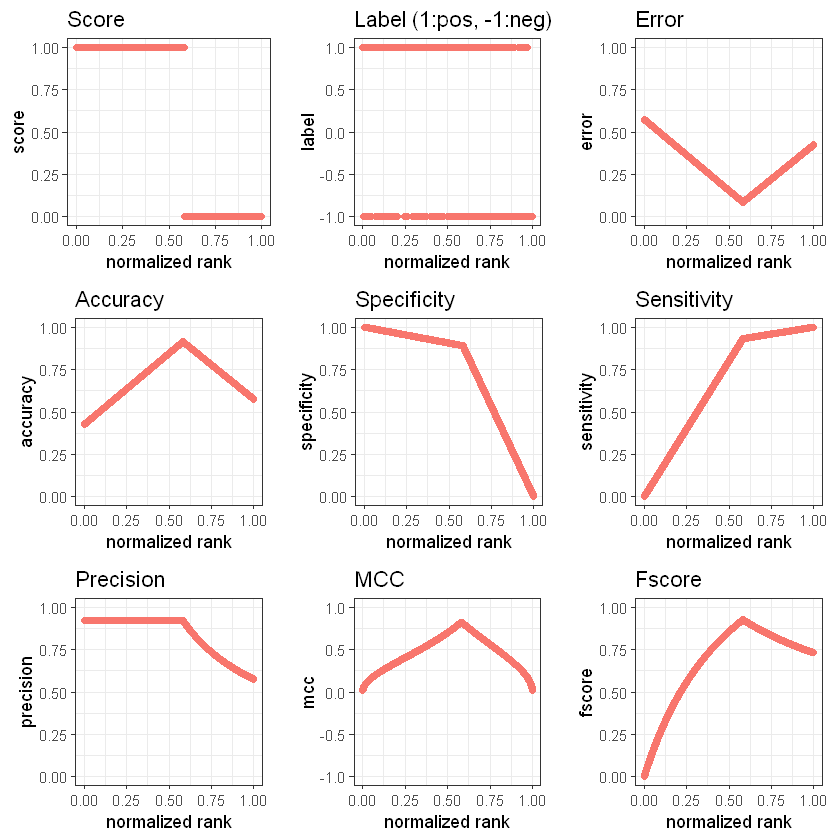

In [80]:
iseprecrecin2 <- evalmod(scores = isepred_directionin, labels = isetrain$direction, mode="basic")
autoplot(iseprecrecin2)

**Análise para os dados de teste**

In [81]:
# Ajustamento do modelo
isepredout <- predict(isemodel, isetest[,-17])

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [82]:
# Conversão do output em uma forma probabilistica
iseprobout <- 1 / (1+exp(-(isepredout)))

head(iseprobout)  

3         8        10        11        17        20 
1.0000000 1.0000000 0.9999997 0.9999963 0.9989438 0.9963362

In [83]:
# Classificação das probabilidades
isepred_directionout <- NULL

# Direção para cima (Up)
isepred_directionout[iseprobout > 0.5] <- 1    

# Direção para baixo (Down)
isepred_directionout[iseprobout <= 0.5] <- 0

In [84]:
# Matriz de Confusão
confusionMatrix(table(isepred_directionout, isetest$direction))

Confusion Matrix and Statistics

                    
isepred_directionout   0   1
                   0 434  44
                   1  45 613
                                          
               Accuracy : 0.9217          
                 95% CI : (0.9045, 0.9366)
    No Information Rate : 0.5783          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8393          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9061          
            Specificity : 0.9330          
         Pos Pred Value : 0.9079          
         Neg Pred Value : 0.9316          
             Prevalence : 0.4217          
         Detection Rate : 0.3820          
   Detection Prevalence : 0.4208          
      Balanced Accuracy : 0.9195          
                                          
       'Positive' Class : 0               

**Curva ROC 1**

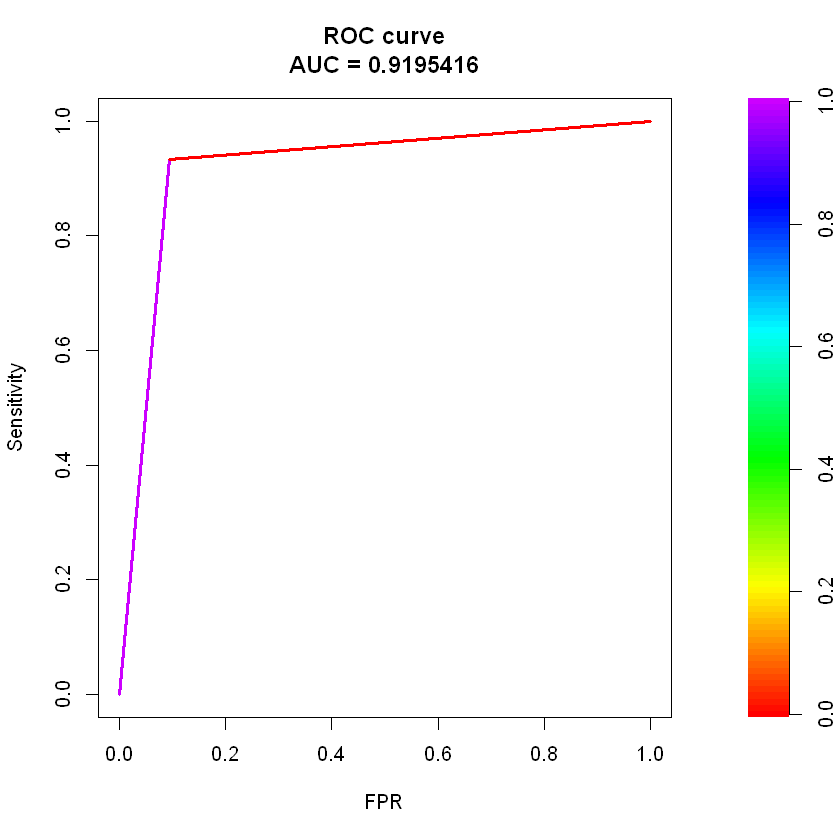

In [85]:
plot(roc.curve(scores.class0 = isepred_directionout, weights.class0=isetest$direction, curve=TRUE))

**Curva ROC 2**

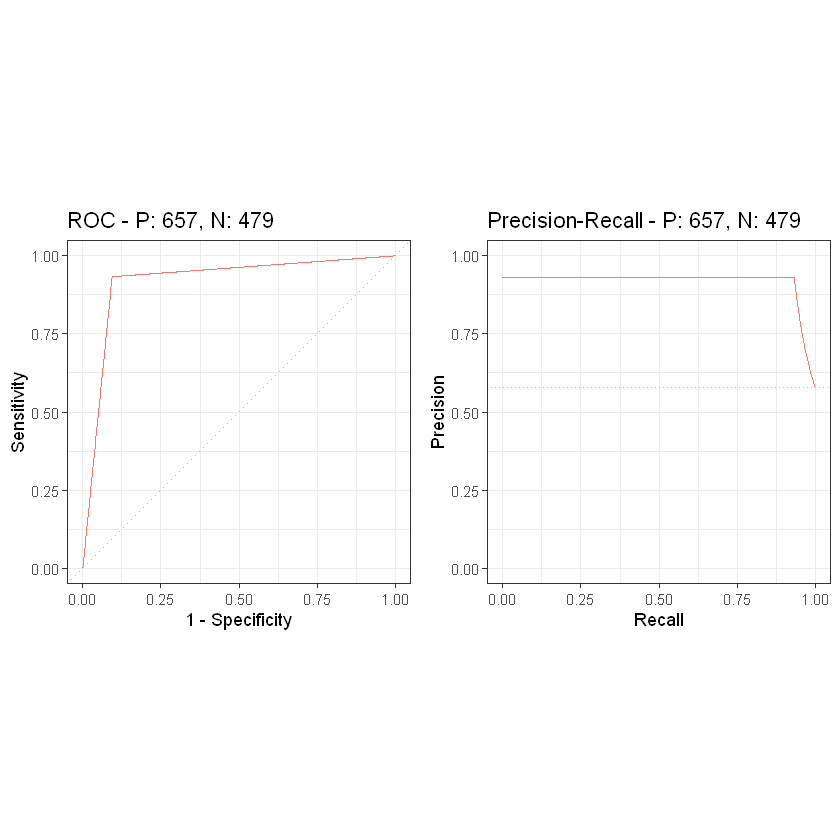

In [86]:
iseprecrecout <- evalmod(scores = isepred_directionout, labels = isetest$direction)
autoplot(iseprecrecout)

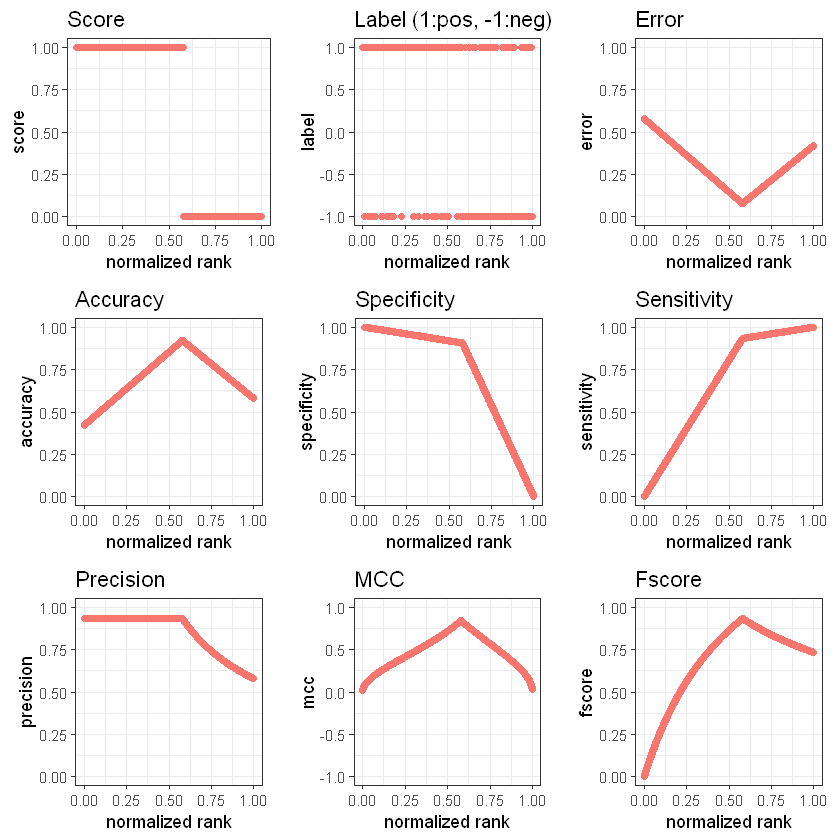

In [87]:
iseprecrecout <- evalmod(scores = isepred_directionout, labels = isetest$direction, mode="basic")
autoplot(iseprecrecout)

## 3. Algoritmo K-means

In [88]:
# Definição do número de clusters
cluster <- 2
set.seed(1)

# O número de clusters corresponde ao número de direções (up = 1, down = 0)

**Remoção das colunas de rótulo**

K-means é um algoritmo do tipo não supervisionado (não trabalha com dados rotulados) e os atributos "direction" e "dirret" funcionam como rótulos.

Rótulos não são desejáveis para algorítmos não supervisionados.

In [89]:
isetrain2 <- isetrain[,-c(16,17)]
isetest2 <- isetest[,-c(16,17)]

**Execução do algoritmo**

In [90]:
isemodel2 <- kmeans(isetrain2[,-1], cluster)

head(isemodel2$cluster)

1 2 4 5 6 7 
2 2 2 2 2 2

In [91]:
# Extração do centróides finais dos cluesters (Centros finais do cluster)
isemodel2$center

close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands
2.407970,2.404664,2.398695,-0.4887530,-0.4731325,-0.4778437,-0.4773248,-0.5231665,-0.5227855,-0.5330743,-0.5238133,-0.5236817,-0.5327323,-0.2944503
1.336266,1.332824,1.331227,-0.4990206,-0.4870340,-0.4791072,-0.4766107,-0.5273632,-0.5265166,-0.5335396,-0.5291131,-0.5292834,-0.5325228,-0.3500562


In [92]:
# Extração do número de pontos de dados de cada cluster    
isemodel2$size

[1] 1163 1424

**Verificação da acurácia do modelo**

In [93]:
# Cálculo da soma dos quadrados entre clusters
round(isemodel2$tot.withinss, digits = 2)

[1] 1685.7

In [94]:
# Cálculo da soma total dos quadrados
round(isemodel2$totss, digits = 2)

[1] 3888.11

In [95]:
# Acurácia = Soma dos quadrados entre os Clusters / Soma Total dos quadrados 
round(isemodel2$tot.withinss/isemodel2$totss, digits = 2)

[1] 0.43

A acurácia do modelo não é satisfatória.

**Previsão**

In [96]:
# Biblioteca(s) Necessária(s)
library(clue)

Warning message:
"package 'clue' was built under R version 3.6.3"

In [97]:
isepredkm <- cl_predict(isemodel2, isetest2[,-1])
head(isepredkm)

[1] 2 2 2 2 2 2

# 4. Árvore de decisão

In [98]:
# Biblioteca(s) Necessária(s)
library(rpart) 
library(rpart.plot)

Warning message:
"package 'rpart.plot' was built under R version 3.6.3"

In [99]:
# Criação da árvore de decisão
isemodel3 <- rpart(formula, isetrain, method = "class")

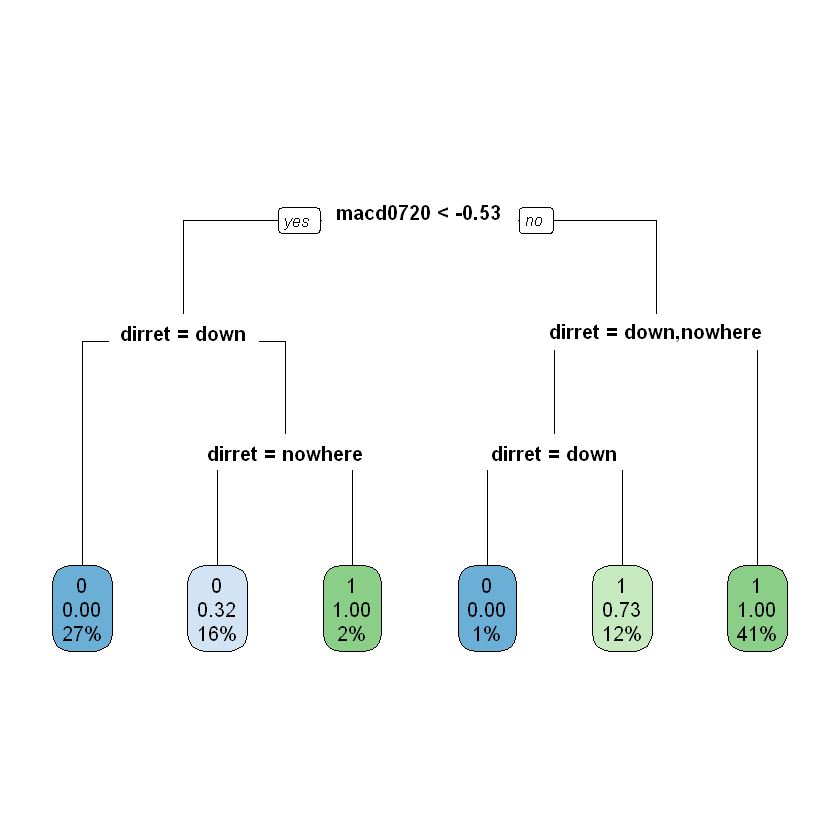

In [100]:
# Criação da árvore gráfica
rpart.plot(isemodel3, type = 0, extra = 106, tweak = 1) 

In [101]:
# Importância dos atributos
iseimp <- varImp(isemodel3, scale = F)
iseimp

,Overall
avg10,9.216755
bbands,11.768007
close,5.572497
dirret,931.781173
macd0720,865.914632
macd1226,708.196508
rsi14,526.608646
signal5,710.855745
signal9,38.792721
std20,11.768007


In [102]:
# Previsão
isepred <- predict(isemodel3, isetest, type = "class")

In [103]:
# Matriz de Confusão
confusionMatrix(table(isepred, isetest$direction)) 

Confusion Matrix and Statistics

       
isepred   0   1
      0 432  63
      1  47 594
                                          
               Accuracy : 0.9032          
                 95% CI : (0.8845, 0.9197)
    No Information Rate : 0.5783          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8024          
                                          
 Mcnemar's Test P-Value : 0.1527          
                                          
            Sensitivity : 0.9019          
            Specificity : 0.9041          
         Pos Pred Value : 0.8727          
         Neg Pred Value : 0.9267          
             Prevalence : 0.4217          
         Detection Rate : 0.3803          
   Detection Prevalence : 0.4357          
      Balanced Accuracy : 0.9030          
                                          
       'Positive' Class : 0               
                                          

## 5. K Nearest Neighborhood

In [104]:
# Biblioteca(s) Necessária(s)
library(class)

In [105]:
# Definição do número de Neighborhoods    
neighborhood <- 3

# O número de neighborhoods corresponde ao número de direções (Up, Down, NoWhere)

set.seed(1)

isdir <- isetrain$dirret

In [106]:
isemodel4 <- knn(isetrain2[,-1], isetest2[,-1], isdir, neighborhood)
head(isemodel4)

[1] up up up up up up
Levels: down nowhere up

In [107]:
summary(isemodel4)

down nowhere      up 
    313     330     493

In [108]:
# Matriz de Confusão
confusionMatrix(table(isemodel4, isetest$dirret)) 

Confusion Matrix and Statistics

         
isemodel4 down nowhere  up
  down     262      47   4
  nowhere   57     209  64
  up         3      54 436

Overall Statistics
                                          
               Accuracy : 0.7984          
                 95% CI : (0.7739, 0.8214)
    No Information Rate : 0.4437          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.6899          
                                          
 Mcnemar's Test P-Value : 0.5825          

Statistics by Class:

                     Class: down Class: nowhere Class: up
Sensitivity               0.8137         0.6742    0.8651
Specificity               0.9373         0.8535    0.9098
Pos Pred Value            0.8371         0.6333    0.8844
Neg Pred Value            0.9271         0.8747    0.8942
Prevalence                0.2835         0.2729    0.4437
Detection Rate            0.2306         0.1840    0.3838
Detection Pre

## 6. Support Vector Machine

In [109]:
isemodel5 <- svm(isetrain2[,-1], as.factor(isdir))
head(isemodel5)

$call
svm.default(x = isetrain2[, -1], y = as.factor(isdir))

$type
[1] 0

$kernel
[1] 2

$cost
[1] 1

$degree
[1] 3

$gamma
[1] 0.07142857


In [110]:
isepredsvm <- predict(isemodel5, isetest2[,-1])
head(isepredsvm)

3  8 10 11 17 20 
up up up up up up 
Levels: down nowhere up

In [111]:
# Matriz de Confusão
confusionMatrix(table(isepredsvm, isetest$dirret)) 

Confusion Matrix and Statistics

          
isepredsvm down nowhere  up
   down     263      42   2
   nowhere   56     210  53
   up         3      58 449

Overall Statistics
                                         
               Accuracy : 0.8116         
                 95% CI : (0.7876, 0.834)
    No Information Rate : 0.4437         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.7091         
                                         
 Mcnemar's Test P-Value : 0.489          

Statistics by Class:

                     Class: down Class: nowhere Class: up
Sensitivity               0.8168         0.6774    0.8909
Specificity               0.9459         0.8680    0.9035
Pos Pred Value            0.8567         0.6583    0.8804
Neg Pred Value            0.9288         0.8776    0.9121
Prevalence                0.2835         0.2729    0.4437
Detection Rate            0.2315         0.1849    0.3952
Detection Prevale

## 7. Regressão Linear

In [112]:
# Construção do modelo
iselm.fit = lm(close ~ avg10 + avg20 + std10 + std20 + rsi14 + rsi5 + macd1226 + signal9 +
                  histogram9 + macd0720 + signal5 + histogram5 + bbands, data = isez)

summary(iselm.fit)


Call:
lm(formula = close ~ avg10 + avg20 + std10 + std20 + rsi14 + 
    rsi5 + macd1226 + signal9 + histogram9 + macd0720 + signal5 + 
    histogram5 + bbands, data = isez)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.12422 -0.00866 -0.00071  0.00796  1.06138 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  240.44392  123.03622   1.954 0.050746 .  
avg10          0.51554    0.01525  33.795  < 2e-16 ***
avg20          0.48459    0.01527  31.741  < 2e-16 ***
std10         -0.10716    0.04641  -2.309 0.020995 *  
std20         -0.02241    0.03391  -0.661 0.508797    
rsi14          0.31891    0.08368   3.811 0.000141 ***
rsi5           0.03323    0.04682   0.710 0.477932    
macd1226    -445.72187  230.88279  -1.931 0.053620 .  
signal9      446.34903  230.93592   1.933 0.053339 .  
histogram9   447.62379  230.99516   1.938 0.052723 .  
macd0720       0.12406    0.09041   1.372 0.170100    
signal

Warning message:
"not plotting observations with leverage one:
  1"Warning message:
"not plotting observations with leverage one:
  1"

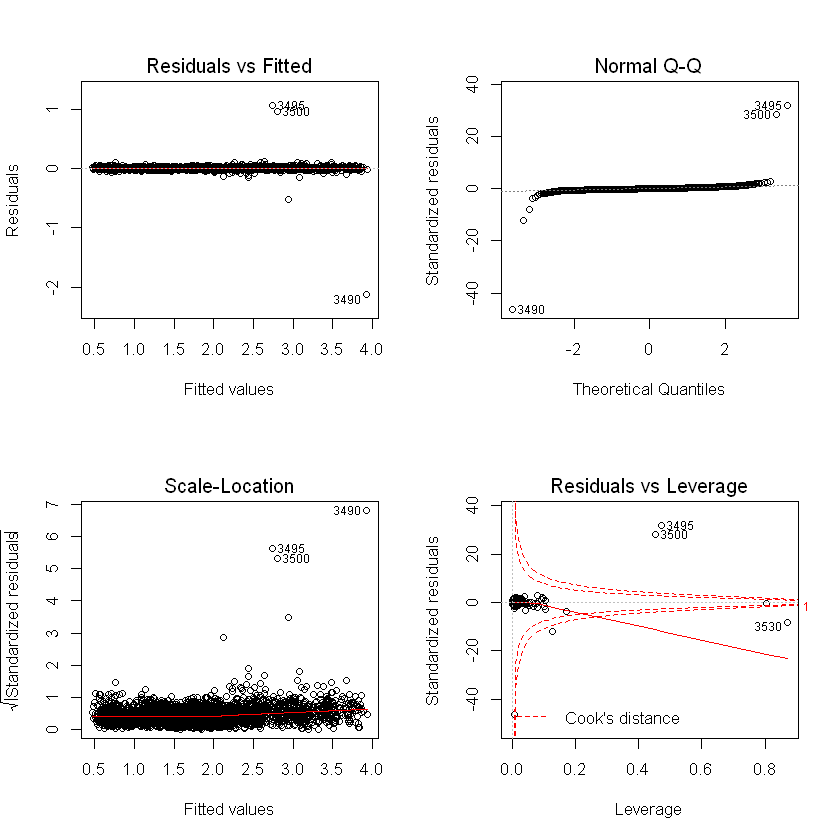

In [113]:
# Análise Gráfica
par(mfrow=c(2,2))
plot(iselm.fit)

In [114]:
# Previsão
iserlm <- predict(iselm.fit, isetest)

Warning message in predict.lm(iselm.fit, isetest):
"prediction from a rank-deficient fit may be misleading"

In [115]:
# Significância do modelo
anova(iselm.fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
avg10,1,1.778108e+03,1.778108e+03,8.422393e+05,0.000000e+00
avg20,1,1.529929e-03,1.529929e-03,7.246839e-01,3.946667e-01
std10,1,9.621493e-01,9.621493e-01,4.557427e+02,1.802514e-95
std20,1,6.557662e-03,6.557662e-03,3.106178e+00,7.807812e-02
rsi14,1,5.662869e+00,5.662869e+00,2.682340e+03,0.000000e+00
rsi5,1,1.890946e+00,1.890946e+00,8.956875e+02,1.776960e-176
macd1226,1,2.691488e-01,2.691488e-01,1.274881e+02,4.310299e-29
signal9,1,3.661806e+00,3.661806e+00,1.734493e+03,2.253671e-311
histogram9,1,1.286411e-03,1.286411e-03,6.093361e-01,4.350877e-01
macd0720,1,1.534576e-03,1.534576e-03,7.268848e-01,3.939499e-01


In [116]:
# Cálculo da importância das variáveis no modelo
round(varImp(iselm.fit, scale = TRUE), digits = 2)

,Overall
avg10,33.80
avg20,31.74
std10,2.31
std20,0.66
rsi14,3.81
rsi5,0.71
macd1226,1.93
signal9,1.93
histogram9,1.94
macd0720,1.37


**Métricas de Avaliação**

In [117]:
# Biblioteca(s) Necessária(s)
library(Metrics)

Warning message:
"package 'Metrics' was built under R version 3.6.3"
Attaching package: 'Metrics'

The following object is masked from 'package:precrec':

    auc

The following objects are masked from 'package:caret':

    precision, recall



In [118]:
# Root Mean Squared Error
round(rmse(isetest$close, iserlm), digits = 2)

[1] 0.05

In [119]:
# Mean Absolute Error
round(mae(isetest$close, iserlm), digits = 2)

[1] 0.01

In [120]:
# Mean Squared Error
round(mse(isetest$close, iserlm), digits = 2)

[1] 0

In [121]:
# Mean Absolute Percent Error
round(mape(isetest$close, iserlm), digits = 2)

[1] 0.01

In [122]:
# Resumo das métricas de avaliação
round(postResample(pred = iserlm, obs = isetest$close), digits = 2)

RMSE Rsquared      MAE 
    0.05     1.00     0.01

**Seleção de modelo mais simples, mas com representatividade semelhante**

In [123]:
# Método Stepwise
step(iselm.fit, direction = "both")

Start:  AIC=-22922.62
close ~ avg10 + avg20 + std10 + std20 + rsi14 + rsi5 + macd1226 + 
    signal9 + histogram9 + macd0720 + signal5 + histogram5 + 
    bbands


Step:  AIC=-22922.62
close ~ avg10 + avg20 + std10 + std20 + rsi14 + rsi5 + macd1226 + 
    signal9 + histogram9 + macd0720 + signal5 + histogram5

             Df Sum of Sq     RSS    AIC
- std20       1   0.00092  7.8334 -22924
- rsi5        1   0.00106  7.8335 -22924
- macd0720    1   0.00397  7.8364 -22923
<none>                     7.8324 -22923
- signal5     1   0.00524  7.8377 -22922
- macd1226    1   0.00787  7.8403 -22921
- signal9     1   0.00789  7.8403 -22921
- histogram9  1   0.00793  7.8404 -22921
- std10       1   0.01126  7.8437 -22919
- rsi14       1   0.03066  7.8631 -22910
- histogram5  1   0.62220  8.4546 -22640
- avg20       1   2.12704  9.9595 -22030
- avg10       1   2.41118 10.2436 -21925

Step:  AIC=-22924.18
close ~ avg10 + avg20 + std10 + rsi14 + rsi5 + macd1226 + signal9 + 
    histogram9 + macd07


Call:
lm(formula = close ~ avg10 + avg20 + std10 + rsi14 + macd1226 + 
    signal9 + histogram9 + macd0720 + signal5 + histogram5, data = isez)

Coefficients:
(Intercept)        avg10        avg20        std10        rsi14     macd1226  
   235.3366       0.5155       0.4845      -0.1261       0.3227    -436.1389  
    signal9   histogram9     macd0720      signal5   histogram5  
   436.7553     437.9991       0.1499       0.1291       2.7181  


In [124]:
# Método backward
step(iselm.fit, direction = "backward")

Start:  AIC=-22922.62
close ~ avg10 + avg20 + std10 + std20 + rsi14 + rsi5 + macd1226 + 
    signal9 + histogram9 + macd0720 + signal5 + histogram5 + 
    bbands


Step:  AIC=-22922.62
close ~ avg10 + avg20 + std10 + std20 + rsi14 + rsi5 + macd1226 + 
    signal9 + histogram9 + macd0720 + signal5 + histogram5

             Df Sum of Sq     RSS    AIC
- std20       1   0.00092  7.8334 -22924
- rsi5        1   0.00106  7.8335 -22924
- macd0720    1   0.00397  7.8364 -22923
<none>                     7.8324 -22923
- signal5     1   0.00524  7.8377 -22922
- macd1226    1   0.00787  7.8403 -22921
- signal9     1   0.00789  7.8403 -22921
- histogram9  1   0.00793  7.8404 -22921
- std10       1   0.01126  7.8437 -22919
- rsi14       1   0.03066  7.8631 -22910
- histogram5  1   0.62220  8.4546 -22640
- avg20       1   2.12704  9.9595 -22030
- avg10       1   2.41118 10.2436 -21925

Step:  AIC=-22924.18
close ~ avg10 + avg20 + std10 + rsi14 + rsi5 + macd1226 + signal9 + 
    histogram9 + macd07


Call:
lm(formula = close ~ avg10 + avg20 + std10 + rsi14 + macd1226 + 
    signal9 + histogram9 + macd0720 + signal5 + histogram5, data = isez)

Coefficients:
(Intercept)        avg10        avg20        std10        rsi14     macd1226  
   235.3366       0.5155       0.4845      -0.1261       0.3227    -436.1389  
    signal9   histogram9     macd0720      signal5   histogram5  
   436.7553     437.9991       0.1499       0.1291       2.7181  


In [125]:
# Método Forward
step(iselm.fit, direction = "forward")

Start:  AIC=-22922.62
close ~ avg10 + avg20 + std10 + std20 + rsi14 + rsi5 + macd1226 + 
    signal9 + histogram9 + macd0720 + signal5 + histogram5 + 
    bbands




Call:
lm(formula = close ~ avg10 + avg20 + std10 + std20 + rsi14 + 
    rsi5 + macd1226 + signal9 + histogram9 + macd0720 + signal5 + 
    histogram5 + bbands, data = isez)

Coefficients:
(Intercept)        avg10        avg20        std10        std20        rsi14  
  240.44392      0.51554      0.48459     -0.10716     -0.02241      0.31891  
       rsi5     macd1226      signal9   histogram9     macd0720      signal5  
    0.03323   -445.72187    446.34903    447.62379      0.12406      0.13381  
 histogram5       bbands  
    2.66834           NA  
